# 1. Business Understanding

In the competitive hotel industry, understanding customer behavior and preferences is essential for effective marketing and customer satisfaction. Hotel H, in Lisbon, part of the independent hotel chain C, has recognized the limitations of its current customer segmentation approach, which mainly relies on customer origin. In order to overcome this limitations, the new marketing manager, A, sees the need for a comprehensive segmentation method that considers geographic, demographic, psychographic, and behavioral characteristics.


**Objective**

The main objectives of this data mining project are:

* Uncover valuable insights about Hotel H's diverse customer base

* Create tailored marketing strategies

* Optimize product offerings and services


**Success Criteria**

The success criteria for this data mining project include:

* Developing effective customer segmentation models

* Enhancing customer satisfaction

* Increasing revenue opportunities

# 2. Data Integration

## 2.1 Libraries Import

In [1]:
# Necessary installations

#!pip install seaborn
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install scipy


# Necessary imports

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from functions import *

from scipy.stats import skew

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2.2 Data Load

In [2]:
# Importing the dataset
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep=';')
df.set_index('ID', inplace=True)

### 2.2.1 Metadata

> Data Description


* ID: Customer ID

* Nationality: Nationality of the customer in ISO 3166-1 (Alpha 3) format

* Age: The age of the customer

* DaysSinceCreation: Number of elapsed days since the customer was created

* NameHash: Hash of the customer's name

* DocIDHash: Hash of the customer’s personal document identification number (usually a passport or ID card)

* AverageLeadTime: Average number of days before arrival date the customer makes bookings

* LodgingRevenue: Total amount of lodging revenue paid by the customer so far

* OtherRevenue: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far

* BookingsCanceled: Number of bookings the customer made but subsequently canceled

* BookingsNoShowed: Number of bookings the customer made but subsequently made a "no-show"

* BookingsCheckedin: Number of bookings the customer made, which actually ended up staying

* PersonNights: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in
each booking, multiplied by the number of Nights (Length-of-stay) of the booking

* RoomNights: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of
rooms of each booking by the the number of Nights (Length-of stay) of the booking

* DistributionChannel: Distribution channel normally used by the customer to make bookings at the hotel

* MarketSegment: Current market segment of the customer

* SRHighFloor: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)

* SRLowFloor: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)

* SRAccessibleRoom: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)

* SRMediumFloor: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)

*  Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)

* SRShower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)

* SRCrib: Indication if the customer usually asks for a crib (0: No, 1: Yes)

* SRKingSizeBed: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)

* SRTwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)

* SRNearElevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)

* SRAwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)

* SRNoAlcoholInMiniBar: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)

* SRQuietRoom: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)


NOTE: All time-based columns (e.g., Age or DaysSinceCreation) were calculated at the dataset extraction date.

### 2.2.2 Data Overview

In [3]:
# Show all the columns when doing head()
pd.set_option('display.max_columns', None)
df.head()

Nationality   Age  DaysSinceCreation  \
ID                                        
1          PRT  52.0                440   
2          PRT   NaN               1385   
3          DEU  32.0               1385   
4          FRA  61.0               1385   
5          FRA  52.0               1385   

                                             NameHash  \
ID                                                      
1   0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
2   0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
3   0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4   0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
5   0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   

                                            DocIDHash  AverageLeadTime  \
ID                                                                       
1   0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
2   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
3   0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
4   0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
5   0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   

    LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                     
1            292.0          82.3                 1                 0   
2            280.0          53.0                 0                 0   
3              0.0           0.0                 0                 0   
4            240.0          60.0                 0                 0   
5              0.0           0.0                 0                 0   

    BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                        
1                   2              6           4              Corporate   
2                   1             10           5  Travel Agent/Operator   
3                   0              0           0  Travel Agent/Operator   
4                   1             10           5  Travel Agent/Operator   
5                   0              0           0  Travel Agent/Operator   

            MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                     
1               Corporate            0           0                 0   
2   Travel Agent/Operator            0           0                 0   
3   Travel Agent/Operator            0           0                 0   
4   Travel Agent/Operator            0           0                 0   
5   Travel Agent/Operator            0           0                 0   

    SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                         
1               0          0         0       0              0          0   
2               0          0         0       0              0          0   
3               0          0         0       0              0          0   
4               0          0         0       0              0          0   
5               0          0         0       0              0          0   

    SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                         
1                0                   0                     0            0  
2                0                   0                     0            0  
3                0                   0                     0            0  
4                0                   0                     0            0  
5                0                   0                     0            0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 2.2.4. Data Types

In [5]:
pd.DataFrame(df.dtypes.rename('Datatype'))

Datatype
Nationality            object
Age                   float64
DaysSinceCreation       int64
NameHash               object
DocIDHash              object
AverageLeadTime         int64
LodgingRevenue        float64
OtherRevenue          float64
BookingsCanceled        int64
BookingsNoShowed        int64
BookingsCheckedIn       int64
PersonsNights           int64
RoomNights              int64
DistributionChannel    object
MarketSegment          object
SRHighFloor             int64
SRLowFloor              int64
SRAccessibleRoom        int64
SRMediumFloor           int64
SRBathtub               int64
SRShower                int64
SRCrib                  int64
SRKingSizeBed           int64
SRTwinBed               int64
SRNearElevator          int64
SRAwayFromElevator      int64
SRNoAlcoholInMiniBar    int64
SRQuietRoom             int64

# 3. Data Understanding

### 3.1 Separating numerical and categorical variables

| Numerical Variables | Categorical Variables (1) |  (2) |
| --- |---------------------------|---------------------------|
| Age | SRHighFloor               | SRAwayFromElevator        |
| AverageLeadTime | SRMediumFloor             | SRNearElevator            |
| BookingsCanceled | SRLowFloor                | SRNoAlcoholInMiniBar      |
| BookingsCheckedIn | SRCrib                    | MarketSegment             |
| BookingsNoShowed | SRTwinBed                 | DistributionChannel       |
| DaysSinceCreation | SRKingSizeBed             | Nationality               |
| LodgingRevenue | SRQuietRoom               |                           |
| OtherRevenue | SRAccessibleRoom          |                           |
| PersonsNights | SRShower                  |                           |
| RoomNights | SRBathtub                 |                           |

In [6]:
# identify numerical and categorical variables
categorical = df.columns[df.columns.str.contains('SR')].tolist() + ['DistributionChannel', 'MarketSegment', 'Nationality']
numerical = df.columns.difference(categorical).tolist()
numerical.remove('DocIDHash')
numerical.remove('NameHash')

### 3.2 Unique values

#### 3.2.1 Values in Numerical

In [7]:
for column in numerical:
    print(f'{column}:{df[column].unique()}')

Age:[ 52.  nan  32.  61.  55.  50.  33.  43.  26.  28.  59.  57.  58.  69.
  73.  72.  25.  27.  51.  53.  37.  65.  66.  48.  68.  40.  42.  44.
   4.  64.  31.  29.  19.  54.  49.  18.  39.  41.  60.  14.  62.  70.
  56.  71.  35.  67.  83.  36.   7.  63.  46.  38.  30.  11.   9.   8.
   5.  45.  10.  34.   6.  47.  21.  15.  75.  12.  74.   2.  23.  20.
  79.  78.  22.  77.  76.  16.  84.  13.  24.  81.  80.  17.  -6.  82.
 115.  85.  -8.  86.  88. -10.  90.  92.  89.  87.  -9.  -5.   0. 111.
   3.  93. 114.  91.   1. 123.  97. 110.  95.]
AverageLeadTime:[ 59  61   0  93  58  38  96  60  87  11 109  63   2  95   7  94   1  85
  78  13  67  65  80  98  97  57   6  72  70 103  49  86  41  69  89  99
  43  52  68  10  71  81  46  84  55  75  54  50  29  77  40  18  42  91
  28  27  44  23 101   3  56  83  39  66   4  31  45  12  24 102  33  32
  25  20   5  35 106  21  30  73   9  16  48  36  79  17  34  64  62   8
  47  15  53  14 105  88  22 129 137  92  51  19 132  26 128 139  76  7

These Features (BookingsCheckedIn, DistributionChannel and MarketSegment) Important to:
1. Understanding Customer Behavior:
    - Some segments frequently cancel or no-show (e.g., Travel Agent/Operator might have higher cancellations).
    - Some channels bring reliable, high-value customers (e.g., Corporate customers may have higher conversion rates).
2. Segmenting Booking Intentions vs. Actual Stays:
    - Helps separate real guests from non-staying bookers.
3. Identifying Booking Trends:
    - Certain channels might be more effective for long-term loyalty, while others may be transactional (e.g., group bookings for events).


#### 3.2.2 Values in Categorical

In [8]:
for column in categorical:
    print(f'{column}:{df[column].unique()}')

SRHighFloor:[0 1]
SRLowFloor:[0 1]
SRAccessibleRoom:[0 1]
SRMediumFloor:[0 1]
SRBathtub:[0 1]
SRShower:[0 1]
SRCrib:[0 1]
SRKingSizeBed:[0 1]
SRTwinBed:[0 1]
SRNearElevator:[0 1]
SRAwayFromElevator:[0 1]
SRNoAlcoholInMiniBar:[0 1]
SRQuietRoom:[0 1]
DistributionChannel:['Corporate' 'Travel Agent/Operator' 'Direct' 'GDS Systems']
MarketSegment:['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Nationality:['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'ARG' 'ARM' 'CHL'
 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV' 'JOR'
 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE' 'AND'
 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT' 'IDN'
 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM' 'BOL'
 'CYP' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM

### 3.3 Descriptive Statistics

#### 3.3.1 Numerical Variables

In [9]:
df[numerical].describe()

Age  AverageLeadTime  BookingsCanceled  BookingsCheckedIn  \
count  107561.000000    111733.000000     111733.000000      111733.000000   
mean       45.639191        60.833147          0.002282           0.737607   
std        17.244952        85.115320          0.080631           0.730889   
min       -10.000000        -1.000000          0.000000           0.000000   
25%        33.000000         0.000000          0.000000           0.000000   
50%        47.000000        21.000000          0.000000           1.000000   
75%        58.000000        95.000000          0.000000           1.000000   
max       123.000000       588.000000         15.000000          76.000000   

       BookingsNoShowed  DaysSinceCreation  LodgingRevenue   OtherRevenue  \
count     111733.000000      111733.000000   111733.000000  111733.000000   
mean           0.000600         595.026599      283.851283      64.682802   
std            0.028217         374.657382      379.131556     123.580715   
min            0.000000          36.000000        0.000000       0.000000   
25%            0.000000         288.000000        0.000000       0.000000   
50%            0.000000         522.000000      208.000000      31.000000   
75%            0.000000         889.000000      393.300000      84.000000   
max            3.000000        1385.000000    21781.000000    8859.250000   

       PersonsNights     RoomNights  
count  111733.000000  111733.000000  
mean        4.328318       2.203825  
std         4.630739       2.301637  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         4.000000       2.000000  
75%         6.000000       3.000000  
max       116.000000     185.000000

#### 3.3.2 Categorical Variables

In [10]:
df[categorical].replace({0: 'No', 1: 'Yes'}).describe()

SRHighFloor SRLowFloor SRAccessibleRoom SRMediumFloor SRBathtub  \
count       111733     111733           111733        111733    111733   
unique           2          2                2             2         2   
top             No         No               No            No        No   
freq        106983     111587           111708        111647    111383   

       SRShower  SRCrib SRKingSizeBed SRTwinBed SRNearElevator  \
count    111733  111733        111733    111733         111733   
unique        2       2             2         2              2   
top          No      No            No        No             No   
freq     111551  109925         71144     94212         111696   

       SRAwayFromElevator SRNoAlcoholInMiniBar SRQuietRoom  \
count              111733               111733      111733   
unique                  2                    2           2   
top                    No                   No          No   
freq               111331               111711      101932   

          DistributionChannel MarketSegment Nationality  
count                  111733        111733      111733  
unique                      4             7         199  
top     Travel Agent/Operator         Other         FRA  
freq                    91019         63680       16516

### 3.4 Univariate Analysis

#### 3.4.1 Numerical Variables

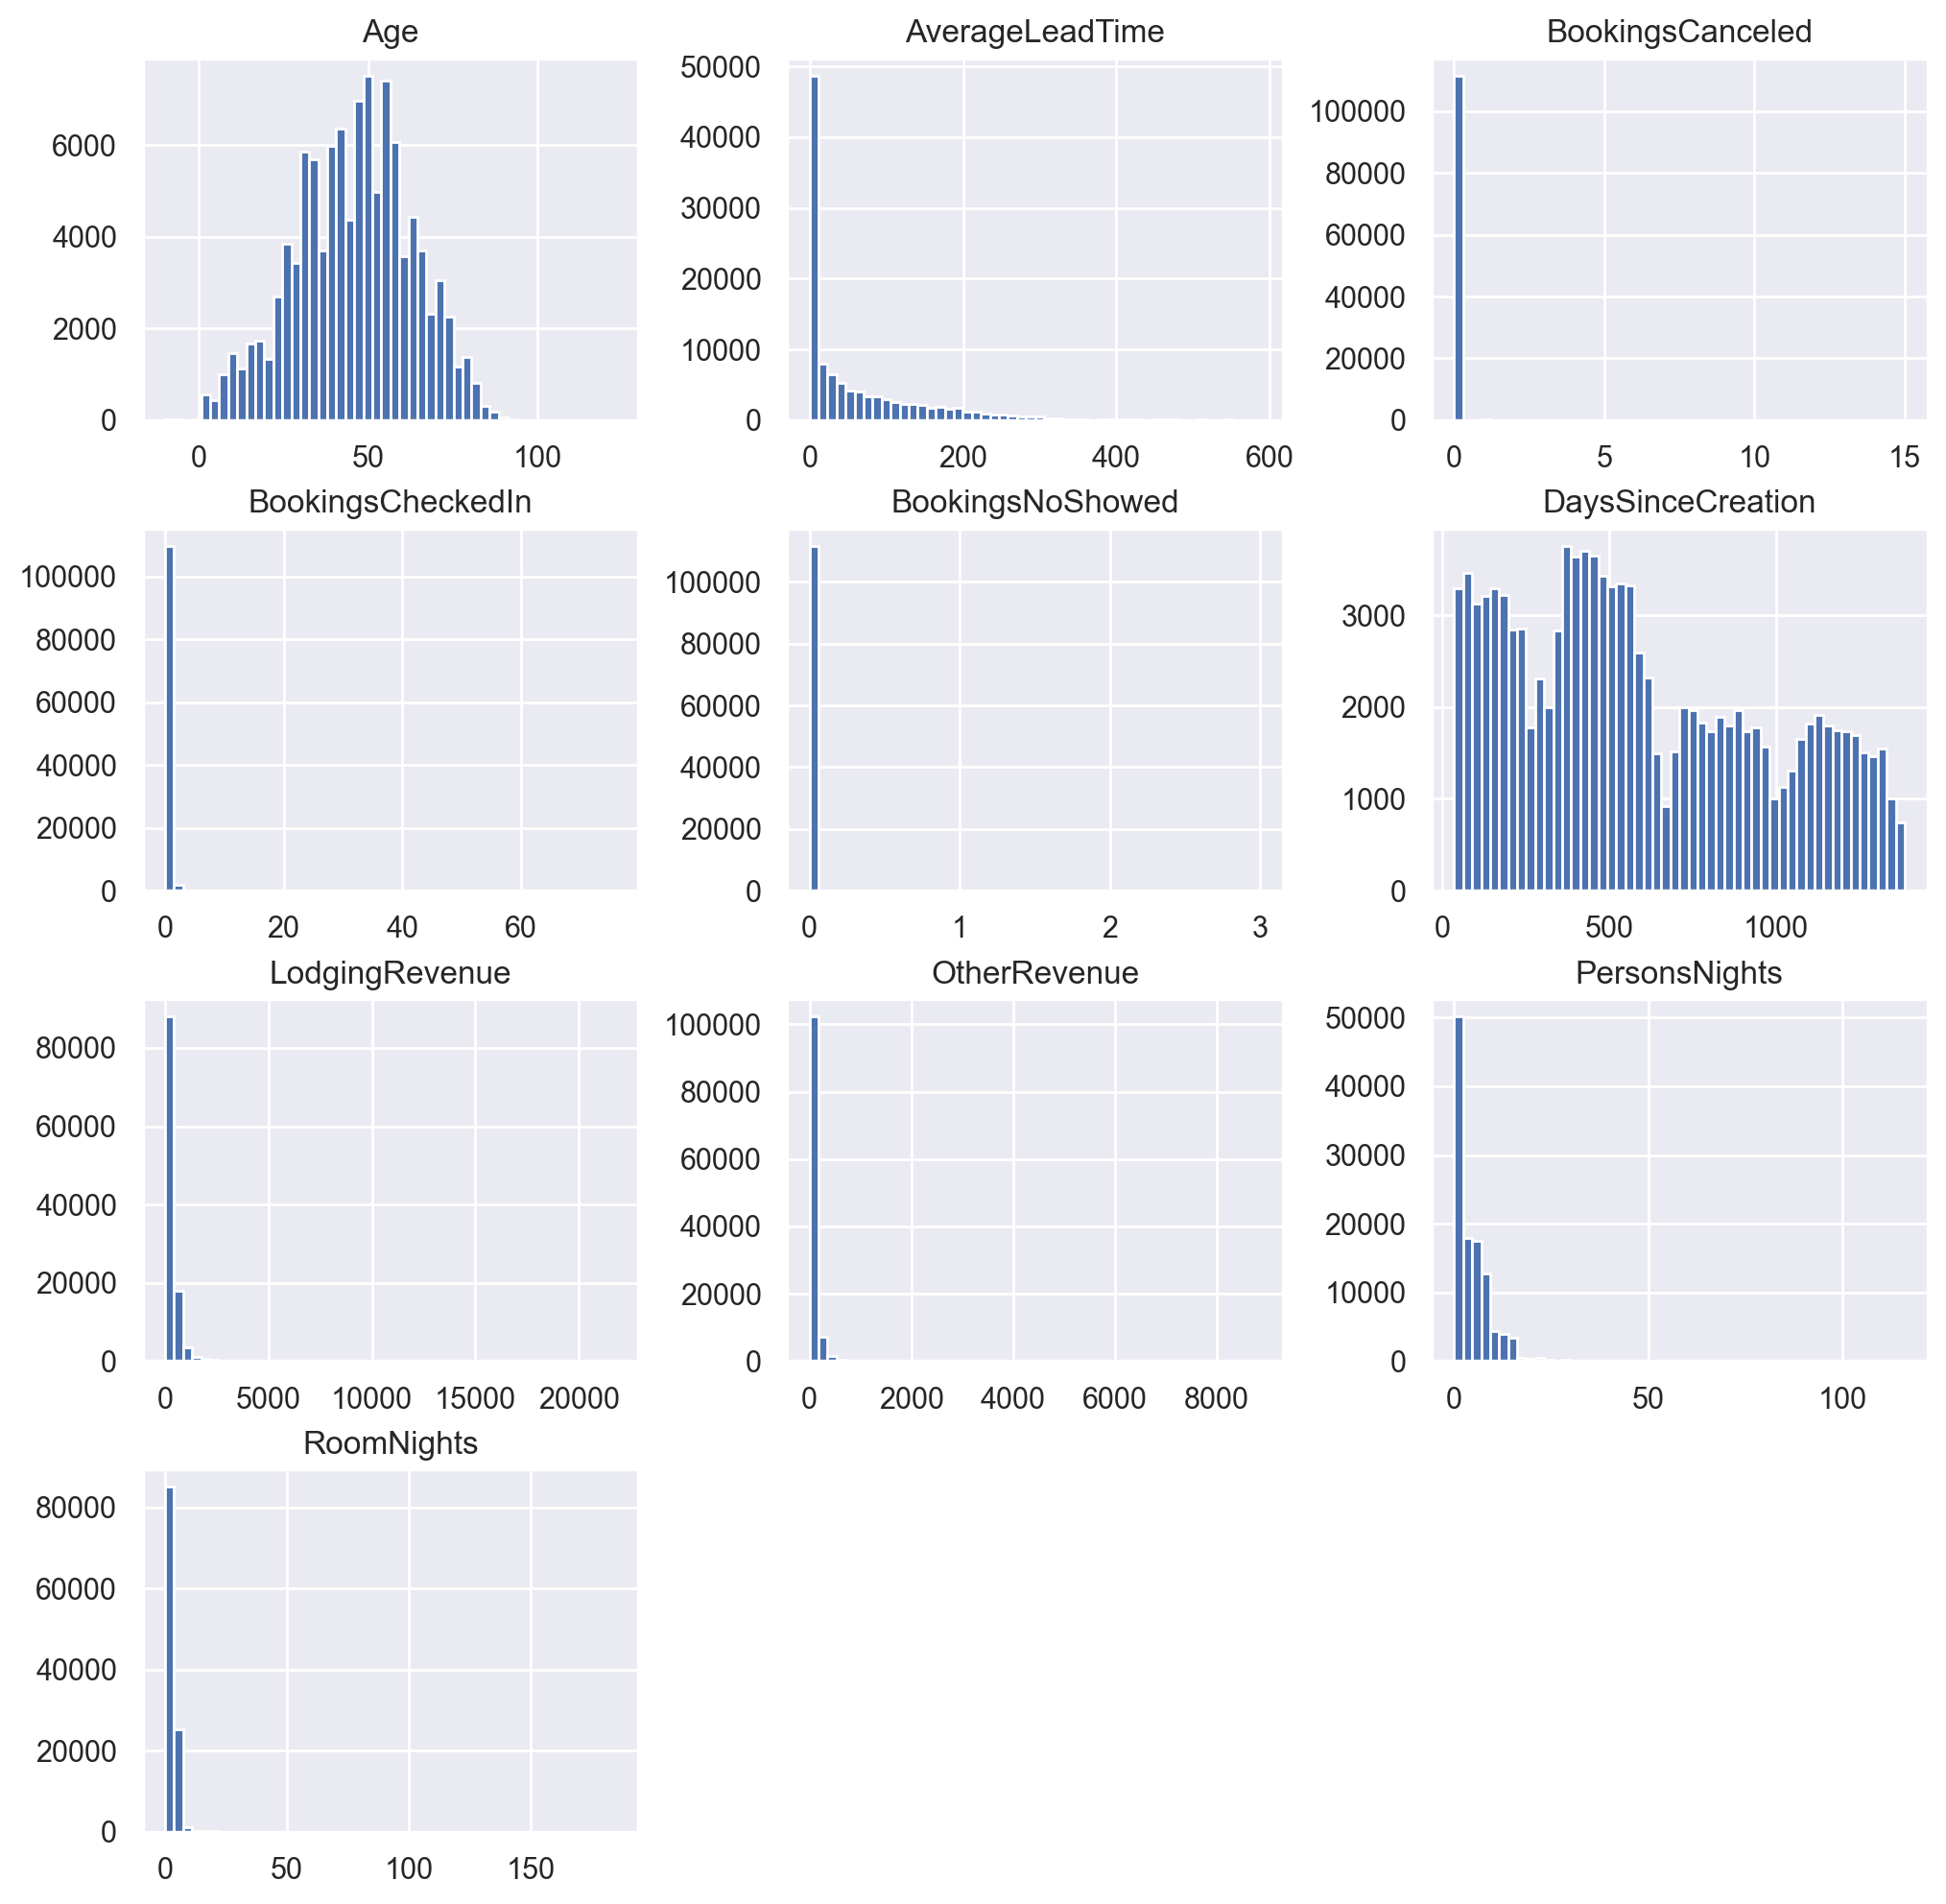

In [11]:
df[numerical].hist(bins=50, figsize=(12,12))
plt.show()


#### 3.4.2 Categorical Variables

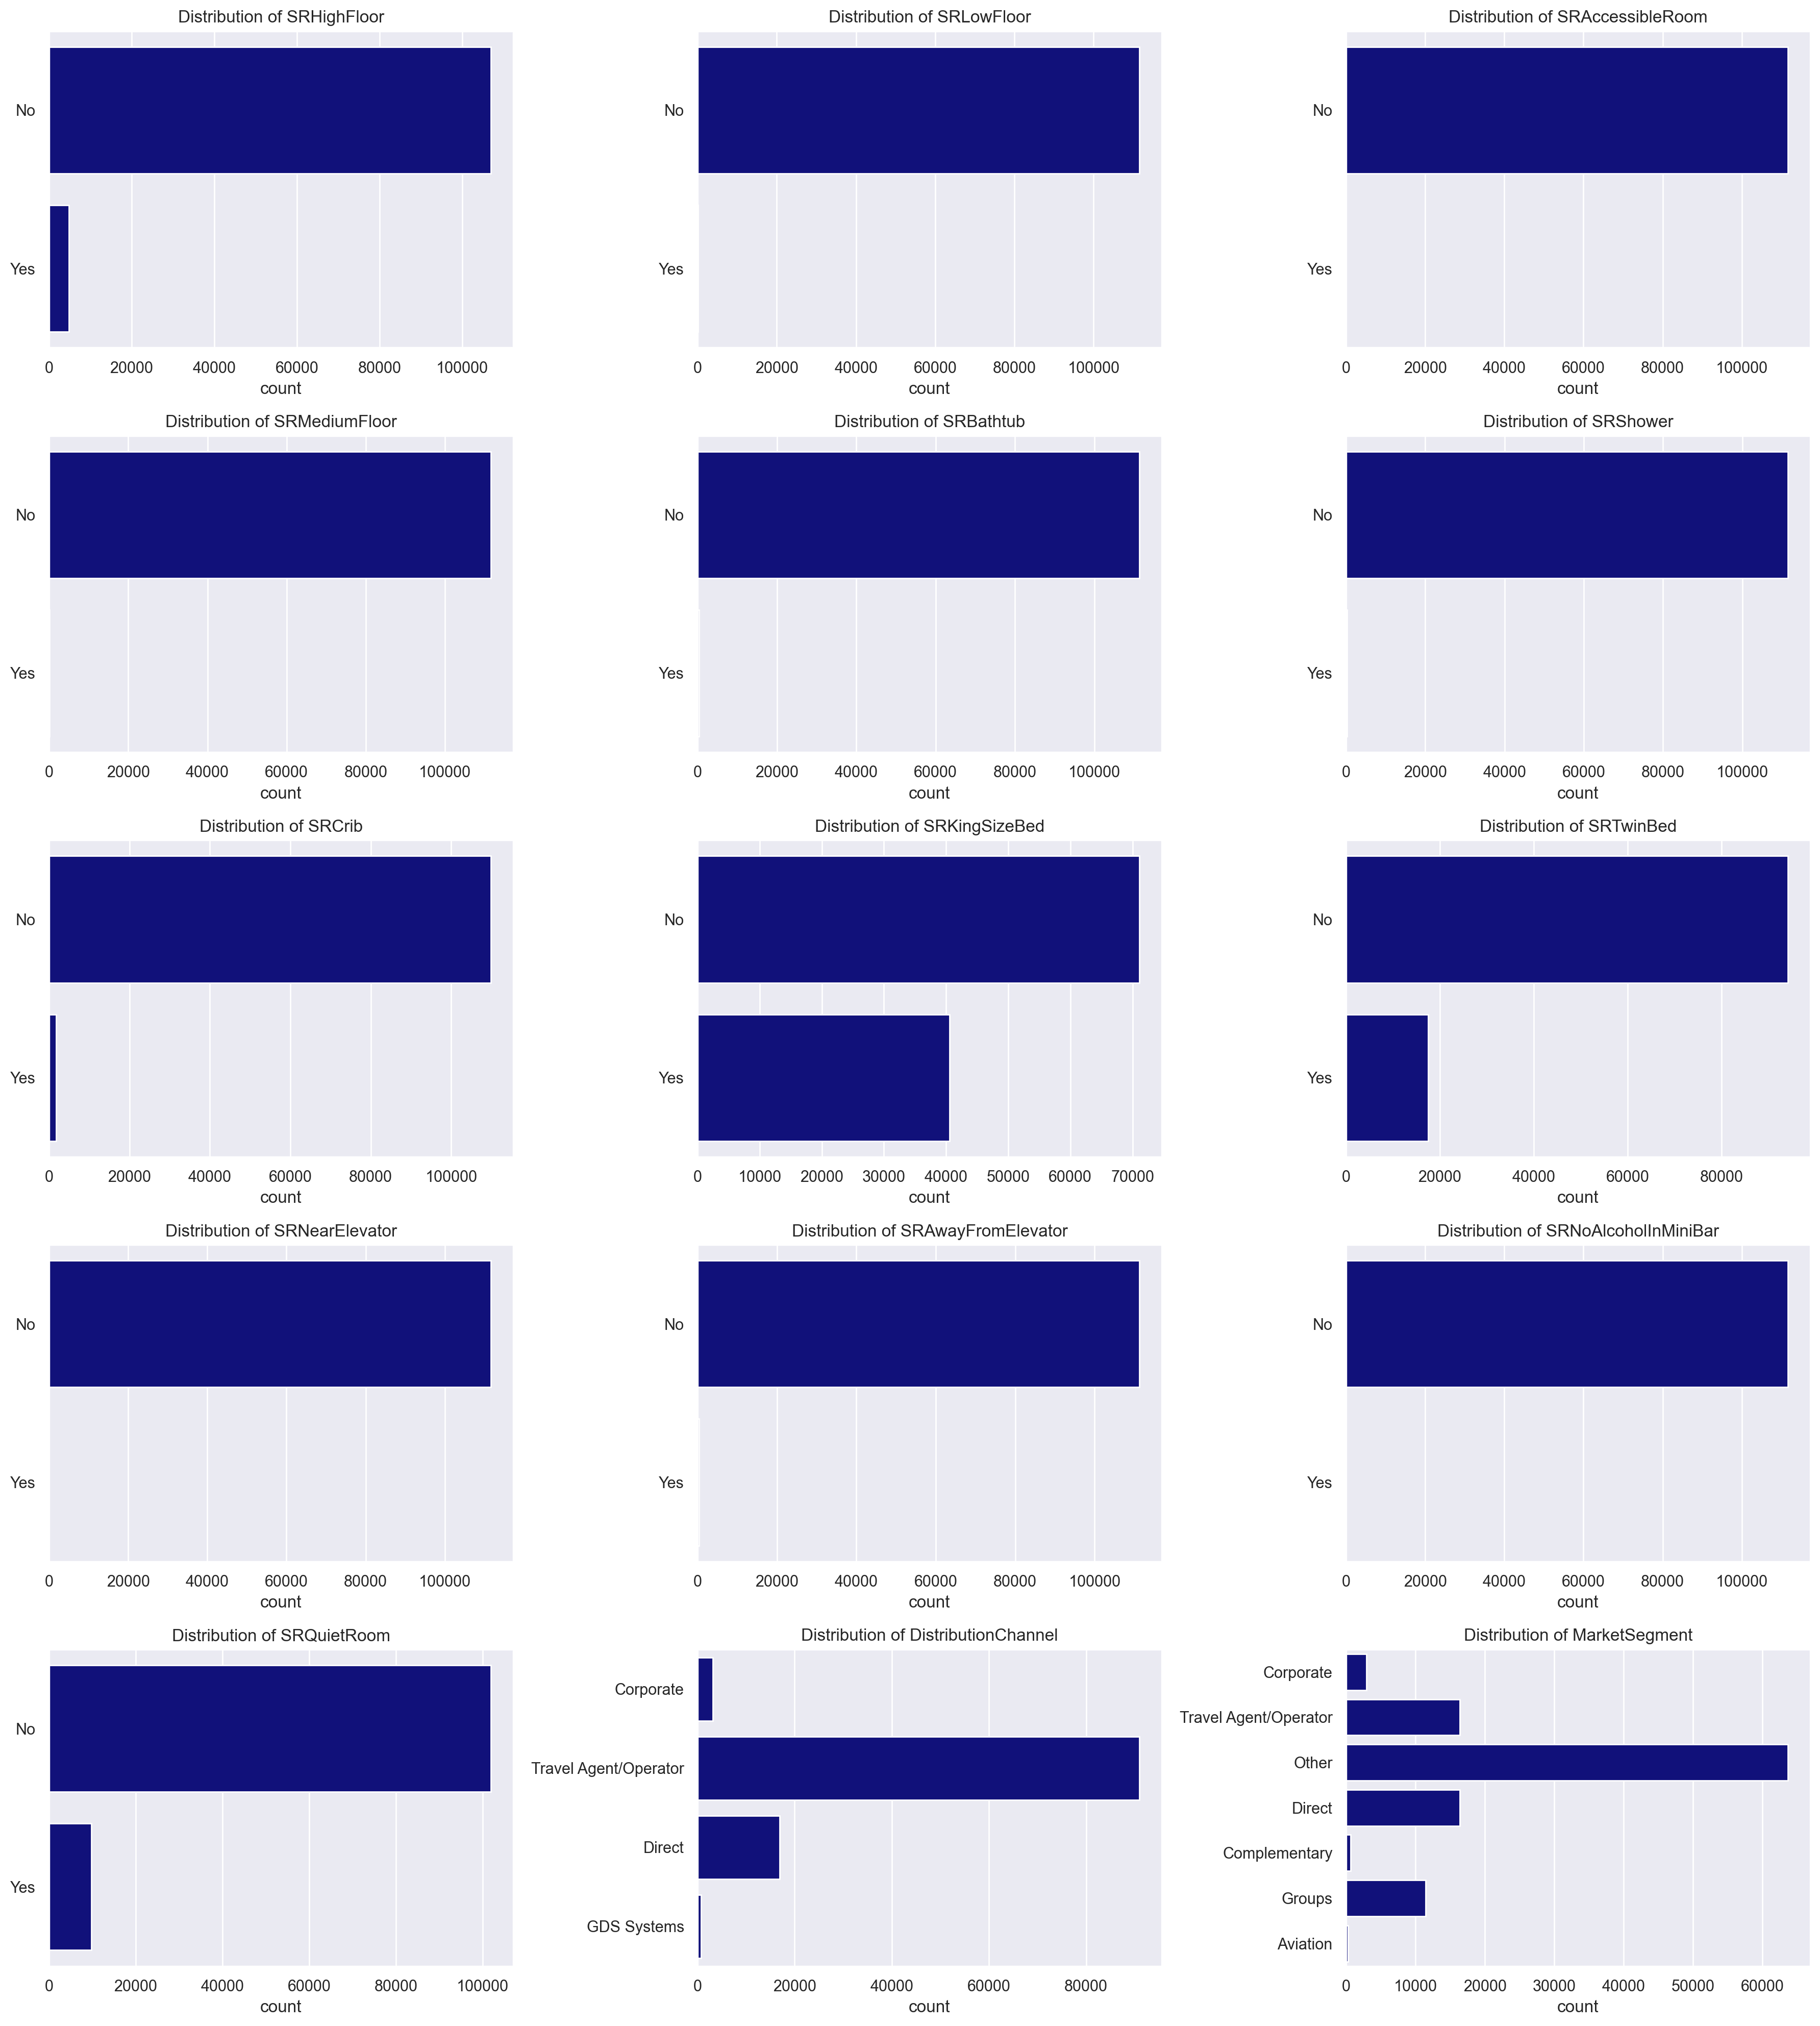

In [12]:
# Create a grid of subplots with 3 plots in each row
fig, axes = plt.subplots(nrows=(len(categorical[:-1]) + 2) // 3, ncols=3, figsize=(18, 4 * ((len(categorical[:-1]) + 2) // 3)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each non-metric feature and create a countplot
for i, col in enumerate(categorical[:-1]):
    sns.countplot(y=col, data=df[categorical].replace({0: 'No', 1: 'Yes'}), color="darkblue", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

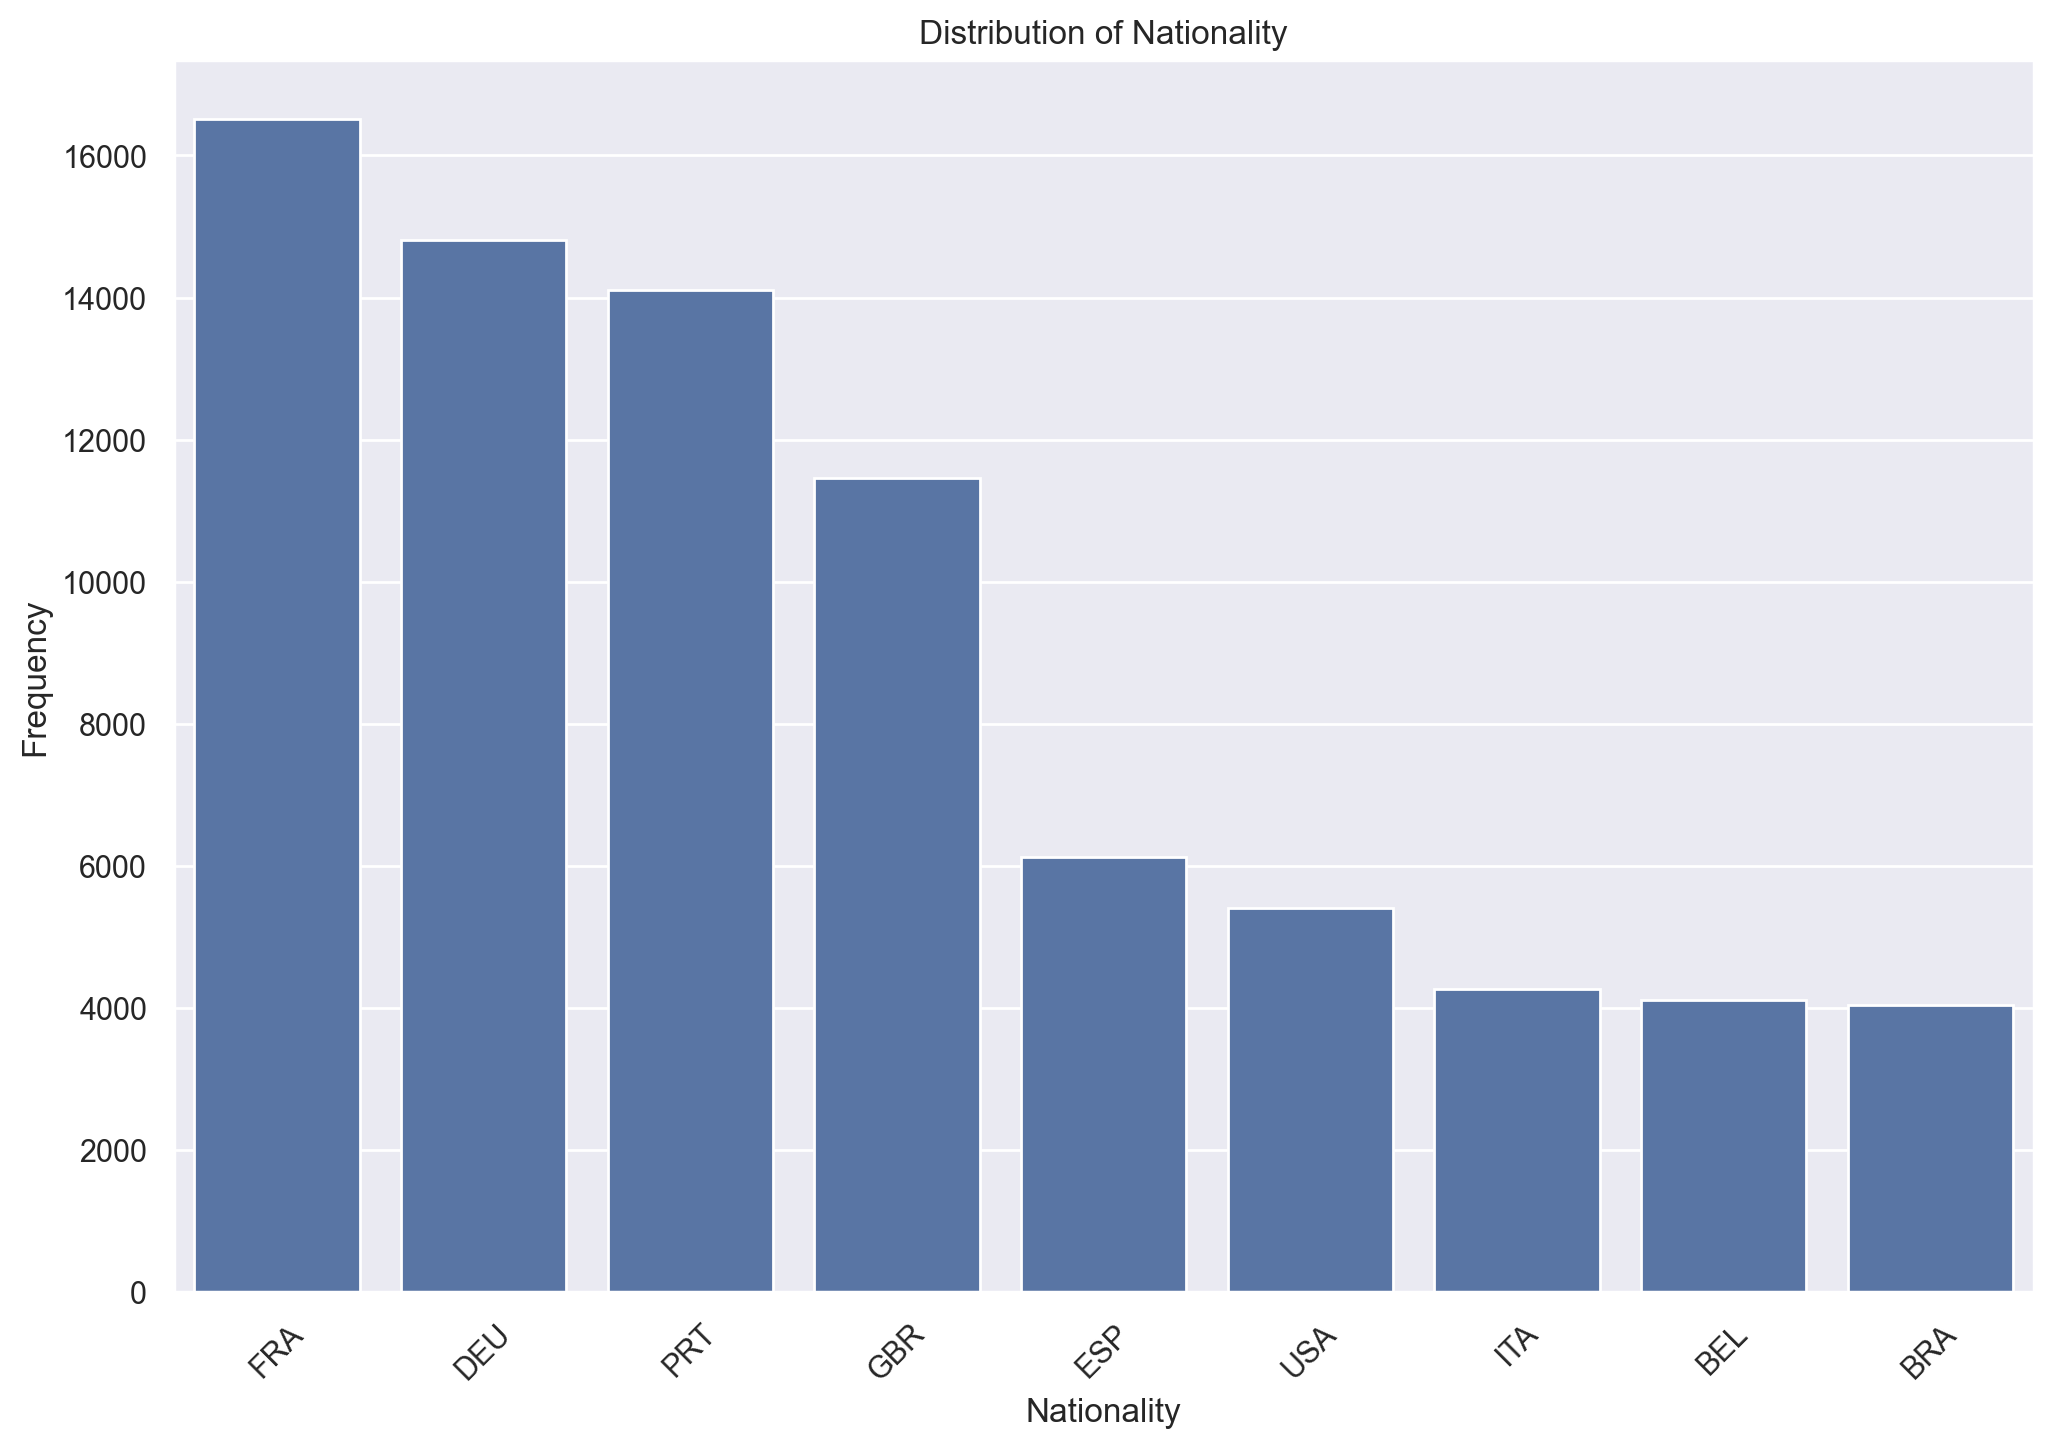

In [13]:
# Calculate the frequency of each nationality
nationality_counts = df['Nationality'].value_counts()

# Define a threshold for grouping less common nationalities
threshold = 4000

# Create a copy of the Nationality column and group less common nationalities into 'Other'
nationality_copy = df['Nationality'].apply(lambda x: x if nationality_counts[x] > threshold else 'Other')

# Calculate the frequency of each grouped nationality
grouped_nationality_counts = nationality_copy.value_counts()

# Exclude the "Other" category
grouped_nationality_counts = grouped_nationality_counts[grouped_nationality_counts.index != 'Other']

# Plot the distribution as a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=grouped_nationality_counts.index, y=grouped_nationality_counts.values)
plt.title('Distribution of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Step 1: Count the number of customers per country
country_counts = df['Nationality'].value_counts().reset_index()
country_counts.columns = ['Nationality', 'CustomerCount']

# Step 2: Create the choropleth map with Mollweide projection
fig = px.choropleth(
    country_counts,  # Data
    locations="Nationality",  # Column with country codes
    locationmode="ISO-3",  # Use ISO-3 country codes (e.g., 'USA', 'GBR')
    color="CustomerCount",  # Column to determine color intensity
    hover_name="Nationality",  # Column to display on hover
    color_continuous_scale="Brwnyl",  # Brown color scale
    title="Customer Distribution by Country (Oval Globe)",  # Map title
    labels={'CustomerCount': 'Number of Customers'},  # Label for the color scale
    projection="mollweide"  # Mollweide projection for oval shape
)

# Step 3: Customize the layout for the oval globe
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the map frame
        showcoastlines=True,  # Show coastlines
        showland=True,  # Show land
        landcolor="lightgray",  # Color of land
        oceancolor="lightblue",  # Color of oceans
        lakecolor="blue",  # Color of lakes
        projection_type="mollweide"  # Mollweide projection for oval shape
    ),
    title_font=dict(size=24, color="brown"),  # Title font and color
    coloraxis_colorbar=dict(title="Customer Count", tickfont=dict(color="brown"))  # Color bar customization
)

# Step 4: Add country borders and resolution
fig.update_geos(
    resolution=110,  # Map resolution
    showcountries=True,  # Show country borders
    countrycolor="black"  # Color of country borders
)

# Step 5: Display the map
fig.show()

### 3.5 Checking for missing values

In [15]:
pd.DataFrame(df.isna().sum().rename('Missing Values Count'))

Missing Values Count
Nationality                              0
Age                                   4172
DaysSinceCreation                        0
NameHash                                 0
DocIDHash                             1001
AverageLeadTime                          0
LodgingRevenue                           0
OtherRevenue                             0
BookingsCanceled                         0
BookingsNoShowed                         0
BookingsCheckedIn                        0
PersonsNights                            0
RoomNights                               0
DistributionChannel                      0
MarketSegment                            0
SRHighFloor                              0
SRLowFloor                               0
SRAccessibleRoom                         0
SRMediumFloor                            0
SRBathtub                                0
SRShower                                 0
SRCrib                                   0
SRKingSizeBed                            0
SRTwinBed                                0
SRNearElevator                           0
SRAwayFromElevator                       0
SRNoAlcoholInMiniBar                     0
SRQuietRoom                              0

### 3.6 Checking for duplicated rows

In [16]:
df[df.duplicated()].head()

Nationality   Age  DaysSinceCreation  \
ID                                          
595          ROU  38.0               1365   
702          BRA  26.0               1359   
1111         PRT   NaN               1345   
1391         PRT   NaN               1340   
1403         PRT   NaN               1340   

                                               NameHash  \
ID                                                        
595   0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...   
702   0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...   
1111  0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...   
1391  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
1403  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   

                                              DocIDHash  AverageLeadTime  \
ID                                                                         
595   0x9CD129744684370C750190DB02D767653BB96C8119B3...                0   
702   0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...                0   
1111                                                NaN                0   
1391                                                NaN                0   
1403                                                NaN                0   

      LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                       
595              0.0           0.0                 0                 0   
702              0.0           0.0                 0                 0   
1111             0.0           0.0                 0                 0   
1391             0.0           0.0                 0                 0   
1403             0.0           0.0                 0                 0   

      BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                          
595                   0              0           0  Travel Agent/Operator   
702                   0              0           0              Corporate   
1111                  0              0           0  Travel Agent/Operator   
1391                  0              0           0  Travel Agent/Operator   
1403                  0              0           0  Travel Agent/Operator   

              MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                       
595                   Other            0           0                 0   
702                  Groups            0           0                 0   
1111  Travel Agent/Operator            0           0                 0   
1391                  Other            0           0                 0   
1403                  Other            0           0                 0   

      SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                           
595               0          0         0       0              1          0   
702               0          0         0       0              0          0   
1111              0          0         0       0              0          0   
1391              0          0         0       0              0          0   
1403              0          0         0       0              0          0   

      SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                           
595                0                   0                     0            0  
702                0                   0                     0            0  
1111               0                   0                     0            0  
1391               0                   0                     0            0  
1403               0                   0                     0            0

### 3.7 Checking for outliers

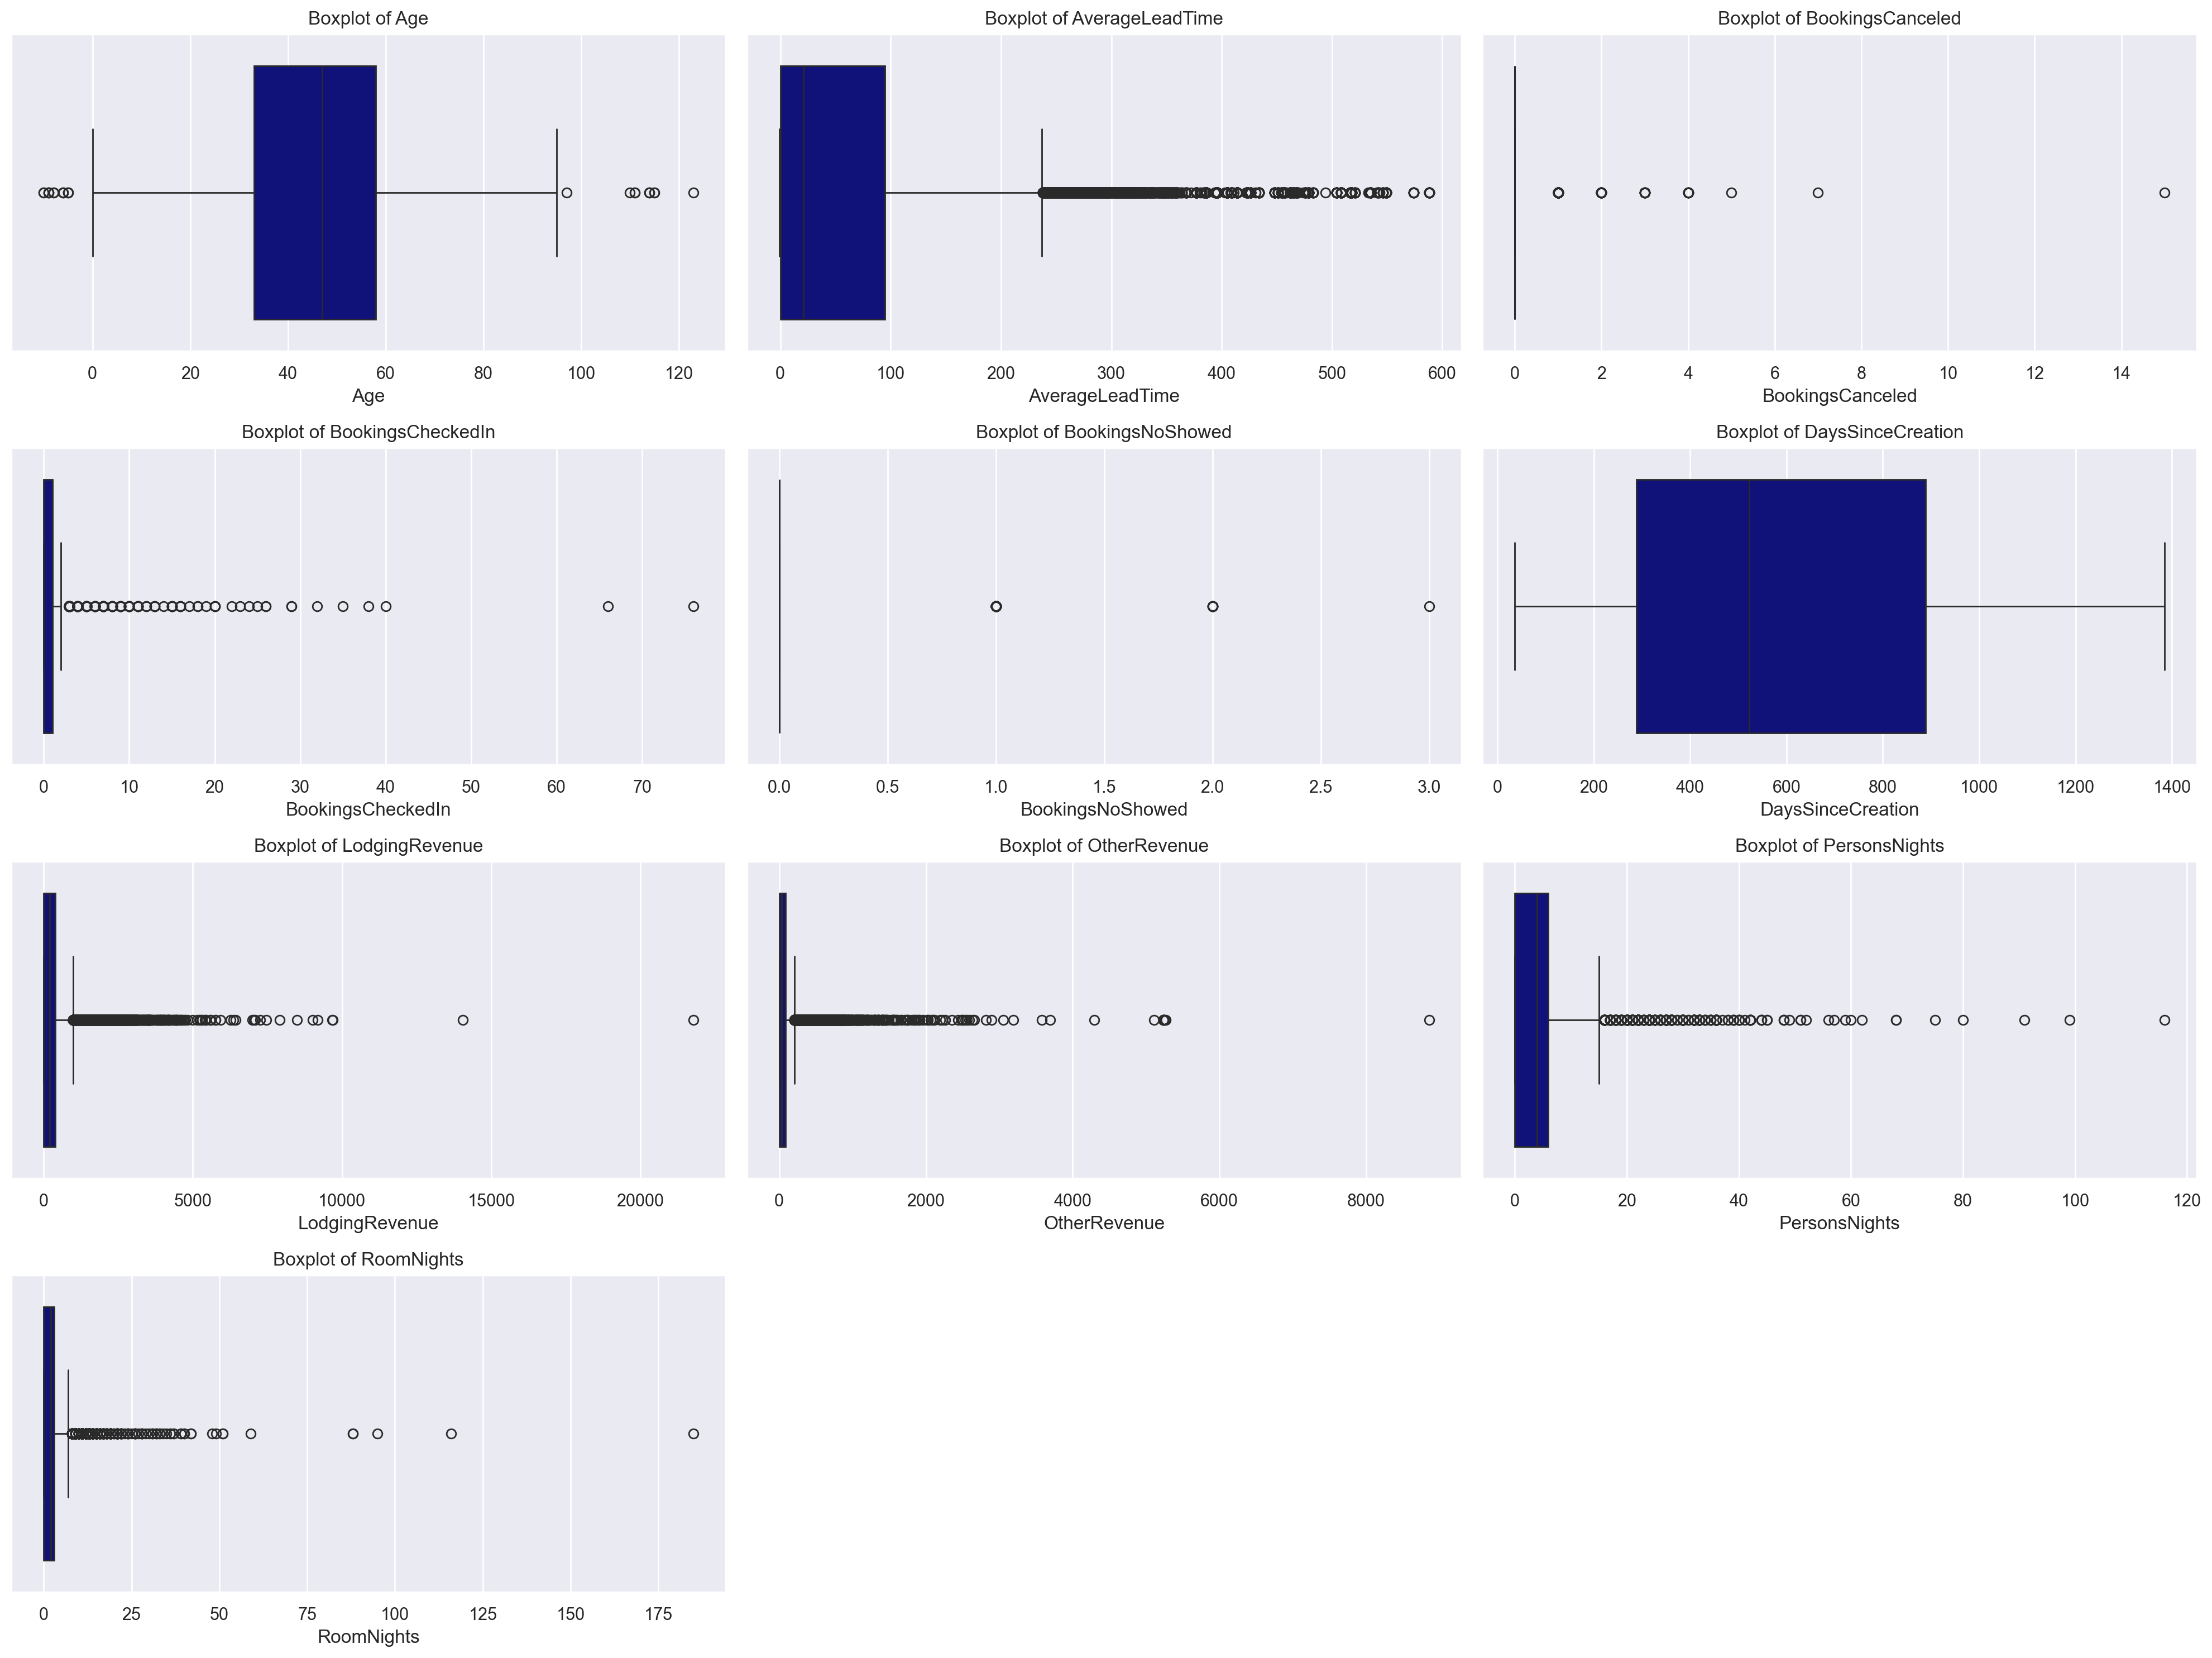

In [17]:
# Create a boxplot for all numerical columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a horizontal boxplot
for i, col in enumerate(numerical):
    sns.boxplot(x=col, data=df, color="darkblue", ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.8 Vizualizing Anomalies and Strage Cases

#### Negative age values and between 0 and 2

In [18]:
df[df['Age'] < 2].head()

Nationality   Age  DaysSinceCreation  \
ID                                          
2053         BIH  -6.0               1324   
2469         ATF  -6.0               1319   
5128         FRA  -8.0               1271   
6752         GBR -10.0               1243   
8361         DEU  -6.0               1217   

                                               NameHash  \
ID                                                        
2053  0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...   
2469  0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...   
5128  0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...   
6752  0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...   
8361  0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...   

                                              DocIDHash  AverageLeadTime  \
ID                                                                         
2053  0x9ED63F460C900B662B890A825398EA74E2AB649383BB...                0   
2469  0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...                0   
5128  0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...               66   
6752  0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...               22   
8361  0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...              256   

      LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                       
2053             0.0           0.0                 0                 0   
2469             0.0           0.0                 0                 0   
5128            93.3          14.0                 0                 0   
6752           450.0          18.0                 0                 0   
8361           126.0         109.0                 0                 0   

      BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                          
2053                  0              0           0  Travel Agent/Operator   
2469                  0              0           0  Travel Agent/Operator   
5128                  1              2           1  Travel Agent/Operator   
6752                  1              1           1  Travel Agent/Operator   
8361                  1              4           2  Travel Agent/Operator   

              MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                       
2053  Travel Agent/Operator            0           0                 0   
2469  Travel Agent/Operator            0           0                 0   
5128                  Other            0           0                 0   
6752                  Other            0           0                 0   
8361                 Groups            0           0                 0   

      SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                           
2053              0          0         0       0              0          0   
2469              0          0         0       0              0          0   
5128              0          0         0       0              1          0   
6752              0          0         0       0              1          0   
8361              0          0         0       0              0          1   

      SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                           
2053               0                   0                     0            0  
2469               0                   0                     0            0  
5128               0                   0                     0            0  
6752               0                   0                     0            0  
8361               0                   0                     0            0

#### Negative AverageLeadTime

In [19]:
df[df['AverageLeadTime'] < 0].head()

Nationality   Age  DaysSinceCreation  \
ID                                           
23064         PRT   NaN                964   
29374         USA  25.0                870   
51375         CHN  33.0                558   
58655         FRA  57.0                499   
58662         FRA  62.0                499   

                                                NameHash  \
ID                                                         
23064  0x498F10CD065519D5A08A680309214C7911457CF2A5CC...   
29374  0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...   
51375  0x61B41490861314B7148F76EE7D7E17A240A86B45259D...   
58655  0x7E60C14F1CDF540841373495CA352FA8579EA1166911...   
58662  0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
23064  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               -1   
29374  0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...               -1   
51375  0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...               -1   
58655  0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...               -1   
58662  0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...               -1   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
23064          352.00          30.0                 0                 0   
29374           77.49           3.0                 0                 0   
51375          129.00           2.0                 0                 0   
58655          149.00           2.0                 0                 0   
58662          149.00           2.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
23064                  1              2           1  Travel Agent/Operator   
29374                  1              3           1  Travel Agent/Operator   
51375                  1              2           1  Travel Agent/Operator   
58655                  1              2           1  Travel Agent/Operator   
58662                  1              2           1  Travel Agent/Operator   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
23064         Other            0           0                 0              0   
29374         Other            0           0                 0              0   
51375         Other            0           0                 0              0   
58655         Other            0           0                 0              0   
58662         Other            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
23064          0         0       0              0          0               0   
29374          0         0       0              0          0               0   
51375          0         0       0              0          0               0   
58655          0         0       0              0          0               0   
58662          0         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
23064                   0                     0            0  
29374                   0                     0            0  
51375                   0                     0            0  
58655                   0                     0            0  
58662                   0                     0            0

#### Revenue without Check-in

In [20]:
df[((df['BookingsCheckedIn'] == 0)) & ((df['LodgingRevenue'] > 0) | (df['OtherRevenue'] > 0))]

Nationality  Age  DaysSinceCreation  \
ID                                          
70580         PRT  NaN                410   

                                                NameHash DocIDHash  \
ID                                                                   
70580  0x68573FCBE31A16536960950762FD290A46A8BDEE8F06...       NaN   

       AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
ID                                                                       
70580              114           249.3          18.0                 0   

       BookingsNoShowed  BookingsCheckedIn  PersonsNights  RoomNights  \
ID                                                                      
70580                 0                  0              0           0   

         DistributionChannel MarketSegment  SRHighFloor  SRLowFloor  \
ID                                                                    
70580  Travel Agent/Operator         Other            0           0   

       SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  SRCrib  \
ID                                                                    
70580                 0              0          0         0       0   

       SRKingSizeBed  SRTwinBed  SRNearElevator  SRAwayFromElevator  \
ID                                                                    
70580              0          0               0                   0   

       SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                        
70580                     0            0

#### More Rooms than Persons

In [21]:
df[df['RoomNights'] > df['PersonsNights']].head()

Nationality   Age  DaysSinceCreation  \
ID                                           
2160          PRT  48.0               1323   
2757          PRT   NaN               1315   
2843          PRT   NaN               1314   
4196          PRT  45.0               1288   
10151         PRT  66.0               1189   

                                                NameHash  \
ID                                                         
2160   0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...   
2757   0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...   
2843   0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...   
4196   0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...   
10151  0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...   

                                               DocIDHash  AverageLeadTime  \
ID                                                                          
2160   0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...               20   
2757   0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...               57   
2843   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...                8   
4196   0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...               75   
10151  0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...               42   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                        
2160          8493.65        2587.5                 3                 1   
2757         21781.00        1584.0                 1                 0   
2843             0.00        5105.5                 0                 0   
4196           138.00          38.5                 0                 0   
10151          826.00         173.0                 3                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                           
2160                  66             75          95              Corporate   
2757                  29             62         185              Corporate   
2843                   3              2          12  Travel Agent/Operator   
4196                   2              2          88  Travel Agent/Operator   
10151                 13             13          15              Corporate   

      MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  \
ID                                                                              
2160      Corporate            0           0                 0              0   
2757         Direct            0           0                 0              0   
2843      Corporate            0           0                 0              0   
4196         Groups            0           0                 0              0   
10151     Corporate            0           0                 0              0   

       SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                                             
2160           0         0       0              1          0               0   
2757           0         0       0              0          0               0   
2843           0         0       0              0          0               0   
4196           0         0       0              0          0               0   
10151          0         0       0              1          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                            
2160                    0                     0            0  
2757                    0                     0            0  
2843                    0                     0            0  
4196                    0                     0            0  
10151                   0                     0            0

#### Clients with 0 Bookings

In [22]:
df[df['BookingsCanceled'] + df['BookingsCheckedIn'] + df['BookingsNoShowed'] == 0].head()

Nationality   Age  DaysSinceCreation  \
ID                                        
3          DEU  32.0               1385   
5          FRA  52.0               1385   
7          JPN  50.0               1385   
9          FRA  43.0               1385   
11         IRL  28.0               1385   

                                             NameHash  \
ID                                                      
3   0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
5   0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
7   0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...   
9   0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...   
11  0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...   

                                            DocIDHash  AverageLeadTime  \
ID                                                                       
3   0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
5   0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
7   0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...                0   
9   0x6C456E45A78A20BC794137AE326A81D587B6528B3944...                0   
11  0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...                0   

    LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                     
3              0.0           0.0                 0                 0   
5              0.0           0.0                 0                 0   
7              0.0           0.0                 0                 0   
9              0.0           0.0                 0                 0   
11             0.0           0.0                 0                 0   

    BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                        
3                   0              0           0  Travel Agent/Operator   
5                   0              0           0  Travel Agent/Operator   
7                   0              0           0  Travel Agent/Operator   
9                   0              0           0  Travel Agent/Operator   
11                  0              0           0  Travel Agent/Operator   

            MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                     
3   Travel Agent/Operator            0           0                 0   
5   Travel Agent/Operator            0           0                 0   
7                   Other            0           0                 0   
9                   Other            0           0                 0   
11  Travel Agent/Operator            0           0                 0   

    SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                         
3               0          0         0       0              0          0   
5               0          0         0       0              0          0   
7               0          0         0       0              0          0   
9               0          0         0       0              1          0   
11              0          0         0       0              0          0   

    SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                         
3                0                   0                     0            0  
5                0                   0                     0            0  
7                0                   0                     0            0  
9                0                   0                     0            0  
11               0                   0                     0            0

### 3.9 Vizualizing Duplicate Rows

In [23]:
# Show duplicates
df[df.duplicated()].head()

Nationality   Age  DaysSinceCreation  \
ID                                          
595          ROU  38.0               1365   
702          BRA  26.0               1359   
1111         PRT   NaN               1345   
1391         PRT   NaN               1340   
1403         PRT   NaN               1340   

                                               NameHash  \
ID                                                        
595   0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...   
702   0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...   
1111  0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...   
1391  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
1403  0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   

                                              DocIDHash  AverageLeadTime  \
ID                                                                         
595   0x9CD129744684370C750190DB02D767653BB96C8119B3...                0   
702   0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...                0   
1111                                                NaN                0   
1391                                                NaN                0   
1403                                                NaN                0   

      LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
ID                                                                       
595              0.0           0.0                 0                 0   
702              0.0           0.0                 0                 0   
1111             0.0           0.0                 0                 0   
1391             0.0           0.0                 0                 0   
1403             0.0           0.0                 0                 0   

      BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
ID                                                                          
595                   0              0           0  Travel Agent/Operator   
702                   0              0           0              Corporate   
1111                  0              0           0  Travel Agent/Operator   
1391                  0              0           0  Travel Agent/Operator   
1403                  0              0           0  Travel Agent/Operator   

              MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
ID                                                                       
595                   Other            0           0                 0   
702                  Groups            0           0                 0   
1111  Travel Agent/Operator            0           0                 0   
1391                  Other            0           0                 0   
1403                  Other            0           0                 0   

      SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
ID                                                                           
595               0          0         0       0              1          0   
702               0          0         0       0              0          0   
1111              0          0         0       0              0          0   
1391              0          0         0       0              0          0   
1403              0          0         0       0              0          0   

      SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                                           
595                0                   0                     0            0  
702                0                   0                     0            0  
1111               0                   0                     0            0  
1391               0                   0                     0            0  
1403               0                   0                     0            0

# 4 Data Preparation

In [24]:
X = df.copy(deep=True)

## 4.1 Removing Duplicates

In [25]:
X.drop_duplicates(subset=['DocIDHash', 'NameHash'], inplace=True)

In [26]:
print(f"The number of droped rows is {df.shape[0] - X.shape[0]}")

The number of droped rows is 3381


### Removing the unnecessary columns

In [27]:
# Dropping unnecessary columns
X.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)
print(f"{df.shape[0]-X.shape[0]} rows were dropped")

3381 rows were dropped


## 4.2 Anomalies dropping and Strange Values treatment

### Strange values

The negative age will be treated as an insertion error. It is possible that the minus was mistakenly typed when this data was collected

In [28]:
X["Age"]=X["Age"].abs()

### Anomalies

In [29]:
anomalies = X[
    (X['Age'] < 2) |
    (X['AverageLeadTime'] < 0) |
    ((X['BookingsCheckedIn'] == 0) &
     ((X['LodgingRevenue'] > 0) | (X['OtherRevenue'] > 0))) |
    ((X['BookingsCanceled'] + X['BookingsCheckedIn'] + X['BookingsNoShowed']) == 0)
]

# Display the filtered dataframe
anomalies.head()


Nationality   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
ID                                                                         
3          DEU  32.0               1385                0             0.0   
5          FRA  52.0               1385                0             0.0   
7          JPN  50.0               1385                0             0.0   
9          FRA  43.0               1385                0             0.0   
11         IRL  28.0               1385                0             0.0   

    OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
ID                                                                        
3            0.0                 0                 0                  0   
5            0.0                 0                 0                  0   
7            0.0                 0                 0                  0   
9            0.0                 0                 0                  0   
11           0.0                 0                 0                  0   

    PersonsNights  RoomNights    DistributionChannel          MarketSegment  \
ID                                                                            
3               0           0  Travel Agent/Operator  Travel Agent/Operator   
5               0           0  Travel Agent/Operator  Travel Agent/Operator   
7               0           0  Travel Agent/Operator                  Other   
9               0           0  Travel Agent/Operator                  Other   
11              0           0  Travel Agent/Operator  Travel Agent/Operator   

    SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
ID                                                                        
3             0           0                 0              0          0   
5             0           0                 0              0          0   
7             0           0                 0              0          0   
9             0           0                 0              0          0   
11            0           0                 0              0          0   

    SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
ID                                                               
3          0       0              0          0               0   
5          0       0              0          0               0   
7          0       0              0          0               0   
9          0       0              1          0               0   
11         0       0              0          0               0   

    SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
ID                                                         
3                    0                     0            0  
5                    0                     0            0  
7                    0                     0            0  
9                    0                     0            0  
11                   0                     0            0

We will drop the anomalies now

In [30]:
X.drop(anomalies.index, inplace=True)

## 4.3 Imputing Missing Values

### Age

> Let's impute customer age with KNN imputer.

In [31]:
# Create a copy of the DataFrame for imputation
df_to_impute = X.copy(deep=True)

# Step 1: Scale the 'Age' column
scaler = StandardScaler()
df_to_impute['Age'] = scaler.fit_transform(df_to_impute[['Age']])

# Step 2: Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_to_impute['Age'] = imputer.fit_transform(df_to_impute[['Age']])

# Step 3: Reverse scaling for interpretability
df_to_impute['Age'] = scaler.inverse_transform(df_to_impute[['Age']])

# Step 4: Round 'Age' to the nearest integer
df_to_impute["Age"] = df_to_impute["Age"].round().astype(int)

# Step 5: Update the original DataFrame with the imputed values
X[numerical] = df_to_impute[numerical]

print(f"Total number of missing values: {X.isna().sum().sum()}")

Total number of missing values: 0


## 4.4 Feature Engineering

### 4.4.1 Numerical new features

In [32]:
# Total Revenue Calculation
X['TotalRevenue'] = X['LodgingRevenue'] + X['OtherRevenue']

# Spending per Check-in: Avoid division by zero
X['SpendingPerCheckin'] = np.where(
    X['BookingsCheckedIn'] > 0,
    X['TotalRevenue'] / X['BookingsCheckedIn'],
    0
)

# Persons per Room: Avoid division by zero
X['PersonsPerRoom'] = np.where(
    X['RoomNights'] > 0,
    X['PersonsNights'] / X['RoomNights'],
    0
)

# Total Bookings
X['TotalBookings'] = X['BookingsCanceled'] + X['BookingsCheckedIn'] + X['BookingsNoShowed']

#BookingFrequency
X['BookingFrequency'] = np.where(
    X['DaysSinceCreation'] > 0,
    X['TotalBookings'] / X['DaysSinceCreation'],
    0
)

#Average Stay Length
X['LodgingSpendPerBooking']= np.where(
    X['TotalBookings'] > 0,
    X['LodgingRevenue'] / X['TotalBookings'],
    0
)

#Room price
X['AverageRoomPrice']= np.where(
    X['RoomNights'] > 0,
    X['LodgingRevenue'] / X['RoomNights'],
    0
)

X["PersonDensity"] = np.where(
    X["TotalBookings"] > 0,
    X["PersonsNights"] / X["TotalBookings"],
    0
)

X["RoomDensity"] = np.where(
    X["TotalBookings"] > 0,
    X["RoomNights"] / X["TotalBookings"],
    0
)

X["PersonRoomRatio"] = np.where(
    X["RoomDensity"] > 0,
    X["PersonDensity"] / X["RoomDensity"],
    0
)
# Extra Revenue Ratio: Avoid division by zero
X['ExtraRevenueRatio'] = np.where(
    X['TotalRevenue'] > 0,
    X['OtherRevenue'] / X['TotalRevenue'],
    0
)

# Booking Conversion Rate: Avoid division by zero
X['BookingConversionRate'] = np.where(
    X['TotalBookings'] > 0,
    X['BookingsCheckedIn'] / X['TotalBookings'],
    0
)

# Spending Per Person: Avoid division by zero
X["SpendingPerPerson"] = np.where(
    X['PersonsNights'] > 0,
    X["TotalRevenue"] / X["PersonsNights"],
    0
)

# Spending Per Room: Avoid division by zero
X["SpendingPerRoom"] = np.where(
    X['RoomNights'] > 0,
    X["TotalRevenue"] / X["RoomNights"],
    0
)

# Average Persons Per Booking: Avoid division by zero
X['AvgPersonsPerBooking'] = np.where(
    X['BookingsCheckedIn'] > 0,
    X['PersonsNights'] / X['BookingsCheckedIn'],
    0
)

# Add the new numerical features to the numerical feature list
numerical = numerical + [
    'TotalRevenue', 'SpendingPerCheckin', 'PersonsPerRoom', 'BookingFrequency', 'RoomDensity',
    'TotalBookings', 'ExtraRevenueRatio', 'BookingConversionRate','PersonDensity',
    "SpendingPerPerson", "SpendingPerRoom", 'AvgPersonsPerBooking', 'PersonRoomRatio','LodgingSpendPerBooking','AverageRoomPrice'
]

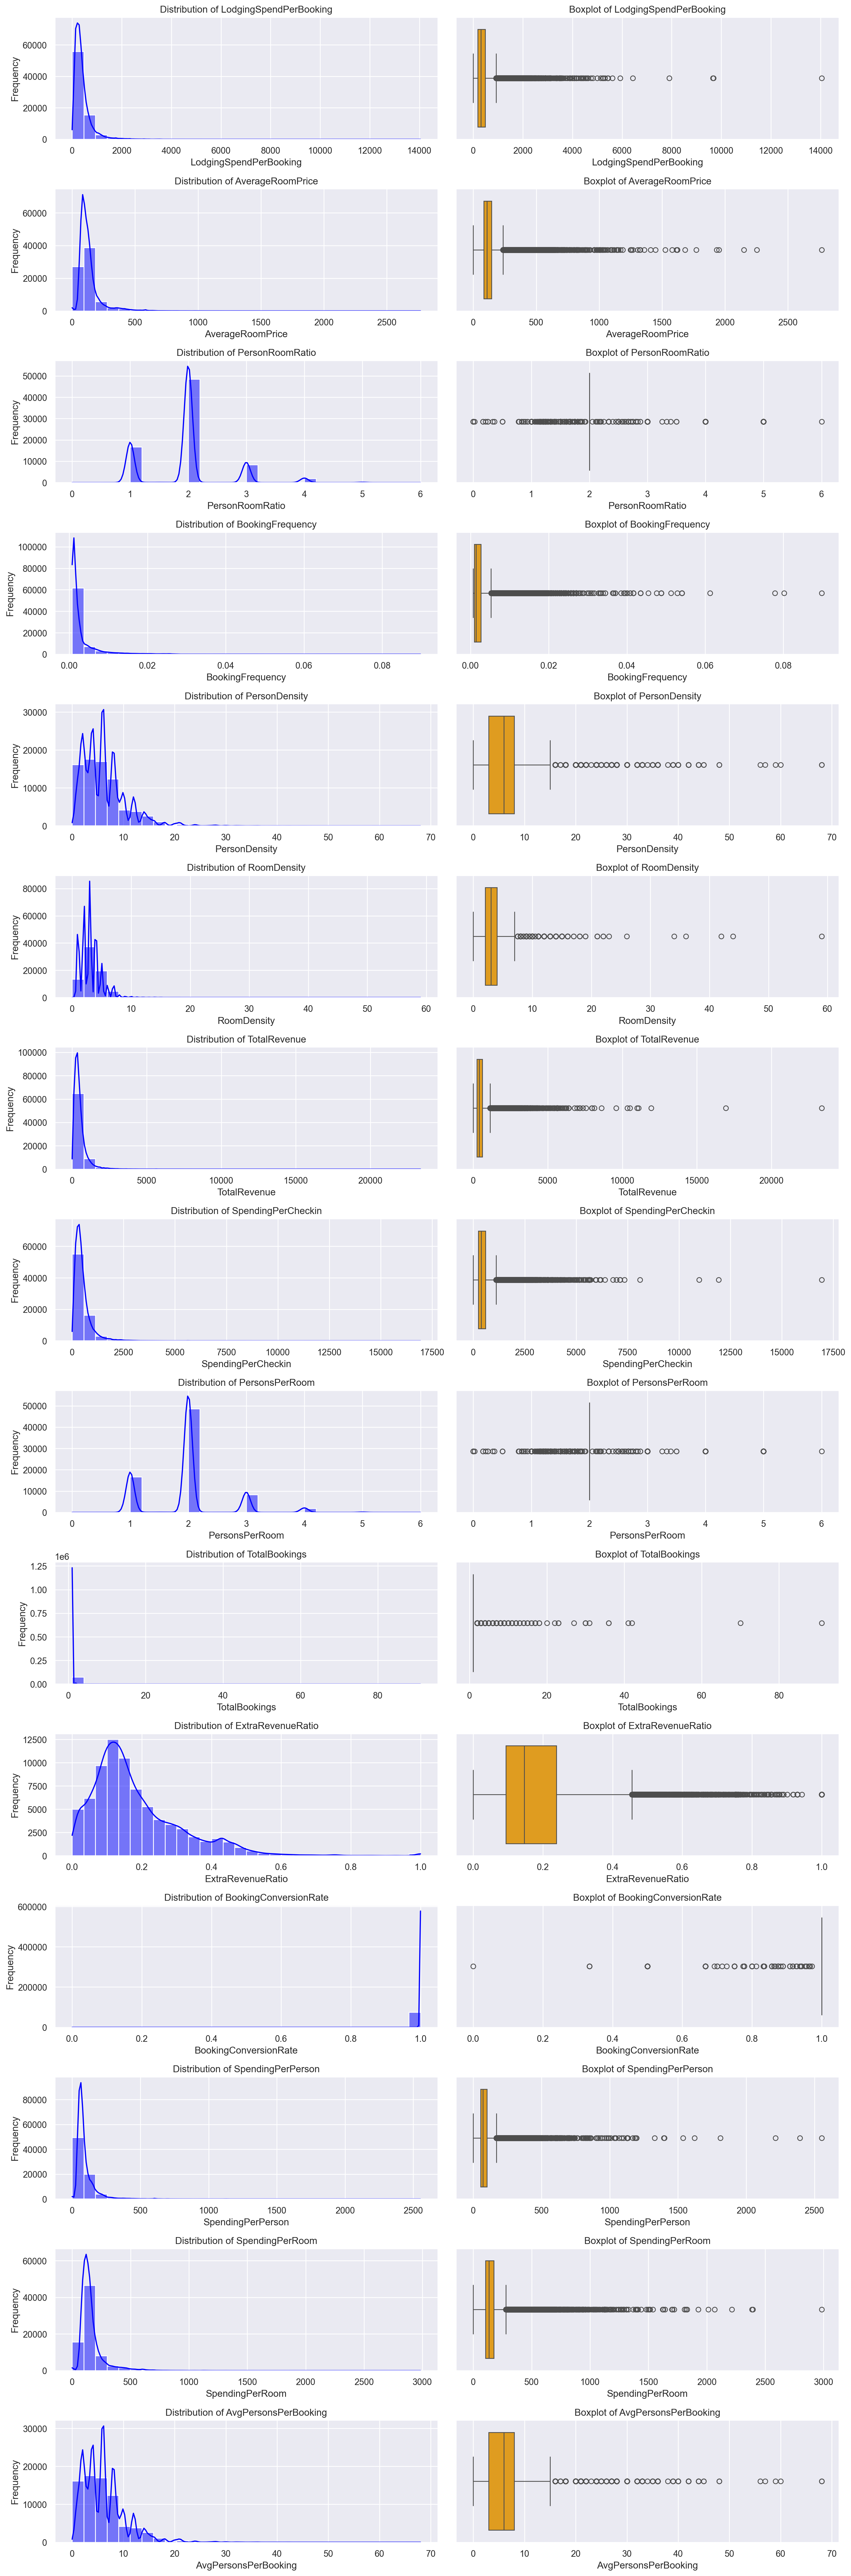

In [33]:
plot_distribution_and_boxplot(X, ['LodgingSpendPerBooking','AverageRoomPrice','PersonRoomRatio', 'BookingFrequency', 'PersonDensity', 'RoomDensity', 'TotalRevenue', 'SpendingPerCheckin', 'PersonsPerRoom', 'TotalBookings', 'ExtraRevenueRatio', 'BookingConversionRate', "SpendingPerPerson", "SpendingPerRoom", 'AvgPersonsPerBooking'])

### 4.4.2 Categorical new features

>1. <code>region</code>: country's continent region.
>2. <code>Spending Tier</code>:  Categorize customers into low, medium, and high spenders.
>3. <code>Age Groups</code>: Create bins (e.g., <25, 25-40, 40-60, 60+).
>4. <code>Lead Time Segments</code>: Group AverageLeadTime (e.g., Last-Minute <7 days, Early Planner >30 days).
>5.  <code>Quiet Room Preference Score</code>: SRQuietRoom + SRAwayFromElevator.


In [34]:
european_countries = {
    'PRT': 'Southern Europe', 'ESP': 'Southern Europe', 'ITA': 'Southern Europe', 'GRC': 'Southern Europe', 'MLT': 'Southern Europe',
    'FRA': 'Western Europe', 'BEL': 'Western Europe', 'NLD': 'Western Europe', 'LUX': 'Western Europe', 'MCO': 'Western Europe',
    'DEU': 'Central Europe', 'AUT': 'Central Europe', 'CHE': 'Central Europe', 'LIE': 'Central Europe',
    'DNK': 'Northern Europe', 'SWE': 'Northern Europe', 'NOR': 'Northern Europe', 'FIN': 'Northern Europe', 'ISL': 'Northern Europe', 
    'IRL': 'British Isles', 'GBR': 'British Isles',
    'POL': 'Eastern Europe', 'CZE': 'Eastern Europe', 'SVK': 'Eastern Europe', 'HUN': 'Eastern Europe', 
    'ROU': 'Eastern Europe', 'BGR': 'Eastern Europe', 'SRB': 'Eastern Europe', 'ALB': 'Eastern Europe', 'HRV': 'Eastern Europe', 
    'SVN': 'Eastern Europe', 'MKD': 'Eastern Europe', 'BIH': 'Eastern Europe', 'MNE': 'Eastern Europe', 
    'EST': 'Baltic States', 'LVA': 'Baltic States', 'LTU': 'Baltic States', 
    'RUS': 'Russia & CIS', 'UKR': 'Russia & CIS', 'BLR': 'Russia & CIS'
}

# Apply mapping: If country is in the European list, assign region; otherwise, assign "Other"
X['Continent'] = X['Nationality'].map(european_countries).fillna("Other")

# Feature 1: Accompanying Guest (1 if more than 1 person per booking, else 0)
X["AccompanyingGuest"] = (X["PersonsNights"] > 1).astype(int)

# Feature 2: Multiple Rooms (1 if more than 1 room, else 0)
X["MultipleRooms"] = (X["RoomNights"] > 1).astype(int)


# 2. Age Groups - Binning Age into categories
X['AgeGroup'] = pd.cut(
    X['Age'],  # Fill NaN with a value that won't match any bin
    bins=[float('-inf'), 30, 50, float('inf')],
    labels=['<30', '30-50', '50+']
)

# 3. Lead Time Segments - Binning AverageLeadTime into categories
X['LeadTimeSegment'] = pd.cut(
    X['AverageLeadTime'],  # Fill NaN with a value that won't match any bin
    bins=[float('-inf'), 7, 30, float('inf')],
    labels=['Last-Minute (<7 Days)', 'Standard (7-30 Days)', 'Early Planner (>30 Days)']
)

# Define conditions
conditions = [
    (X[['SRHighFloor', 'SRLowFloor', 'SRMediumFloor']].sum(axis=1) == 0),
    (X['SRHighFloor'] == 1) & (X[['SRLowFloor', 'SRMediumFloor']].sum(axis=1) == 0),
    (X['SRLowFloor'] == 1) & (X[['SRHighFloor', 'SRMediumFloor']].sum(axis=1) == 0),
    (X['SRMediumFloor'] == 1) & (X[['SRHighFloor', 'SRLowFloor']].sum(axis=1) == 0),
]

categories = ['Not specified', 'HighFloor', 'LowFloor', 'MediumFloor']
X['FloorAsked'] = np.select(conditions, categories, default="Other")

conditions = [
    (X[['SRShower', 'SRBathtub']].sum(axis=1) == 0),
    (X['SRShower'] == 1) & (X[['SRBathtub']].sum(axis=1) == 0),
    (X['SRBathtub'] == 1) & (X[['SRShower']].sum(axis=1) == 0),
]

categories = ['Not specified', 'Shower', 'Bathtub']
X['BathAsked'] = np.select(conditions, categories, default="Other")

conditions = [
    (X[['SRKingSizeBed', 'SRTwinBed']].sum(axis=1) == 0),
    (X['SRKingSizeBed'] == 1) & (X[['SRTwinBed']].sum(axis=1) == 0),
    (X['SRTwinBed'] == 1) & (X[['SRKingSizeBed']].sum(axis=1) == 0),
]

categories = ['Not specified', 'KingSizeBed', 'TwinBed']
X['BedAsked'] = np.select(conditions, categories, default="Other")

conditions = [
    (X[['SRAwayFromElevator', 'SRNearElevator']].sum(axis=1) == 0),
    (X['SRAwayFromElevator'] == 1) & (X[['SRNearElevator']].sum(axis=1) == 0),
    (X['SRNearElevator'] == 1) & (X[['SRAwayFromElevator']].sum(axis=1) == 0),
]

categories = ['Not specified', 'Away from elevator', 'Near Elevator']
X['DistanceElevatorAsked'] = np.select(conditions, categories, default="Other")

for var in ["SRHighFloor", "SRLowFloor", "SRMediumFloor", "SRShower", "SRBathtub", "SRKingSizeBed", "SRTwinBed", "SRAwayFromElevator", "SRNearElevator"]:
    categorical.remove(var)
    X.drop(columns=[var], inplace=True)

categorical += ['AccompanyingGuest', "MultipleRooms", 'Continent', 'AgeGroup', 'LeadTimeSegment', 'FloorAsked', 'BathAsked', 'BedAsked', 'DistanceElevatorAsked']


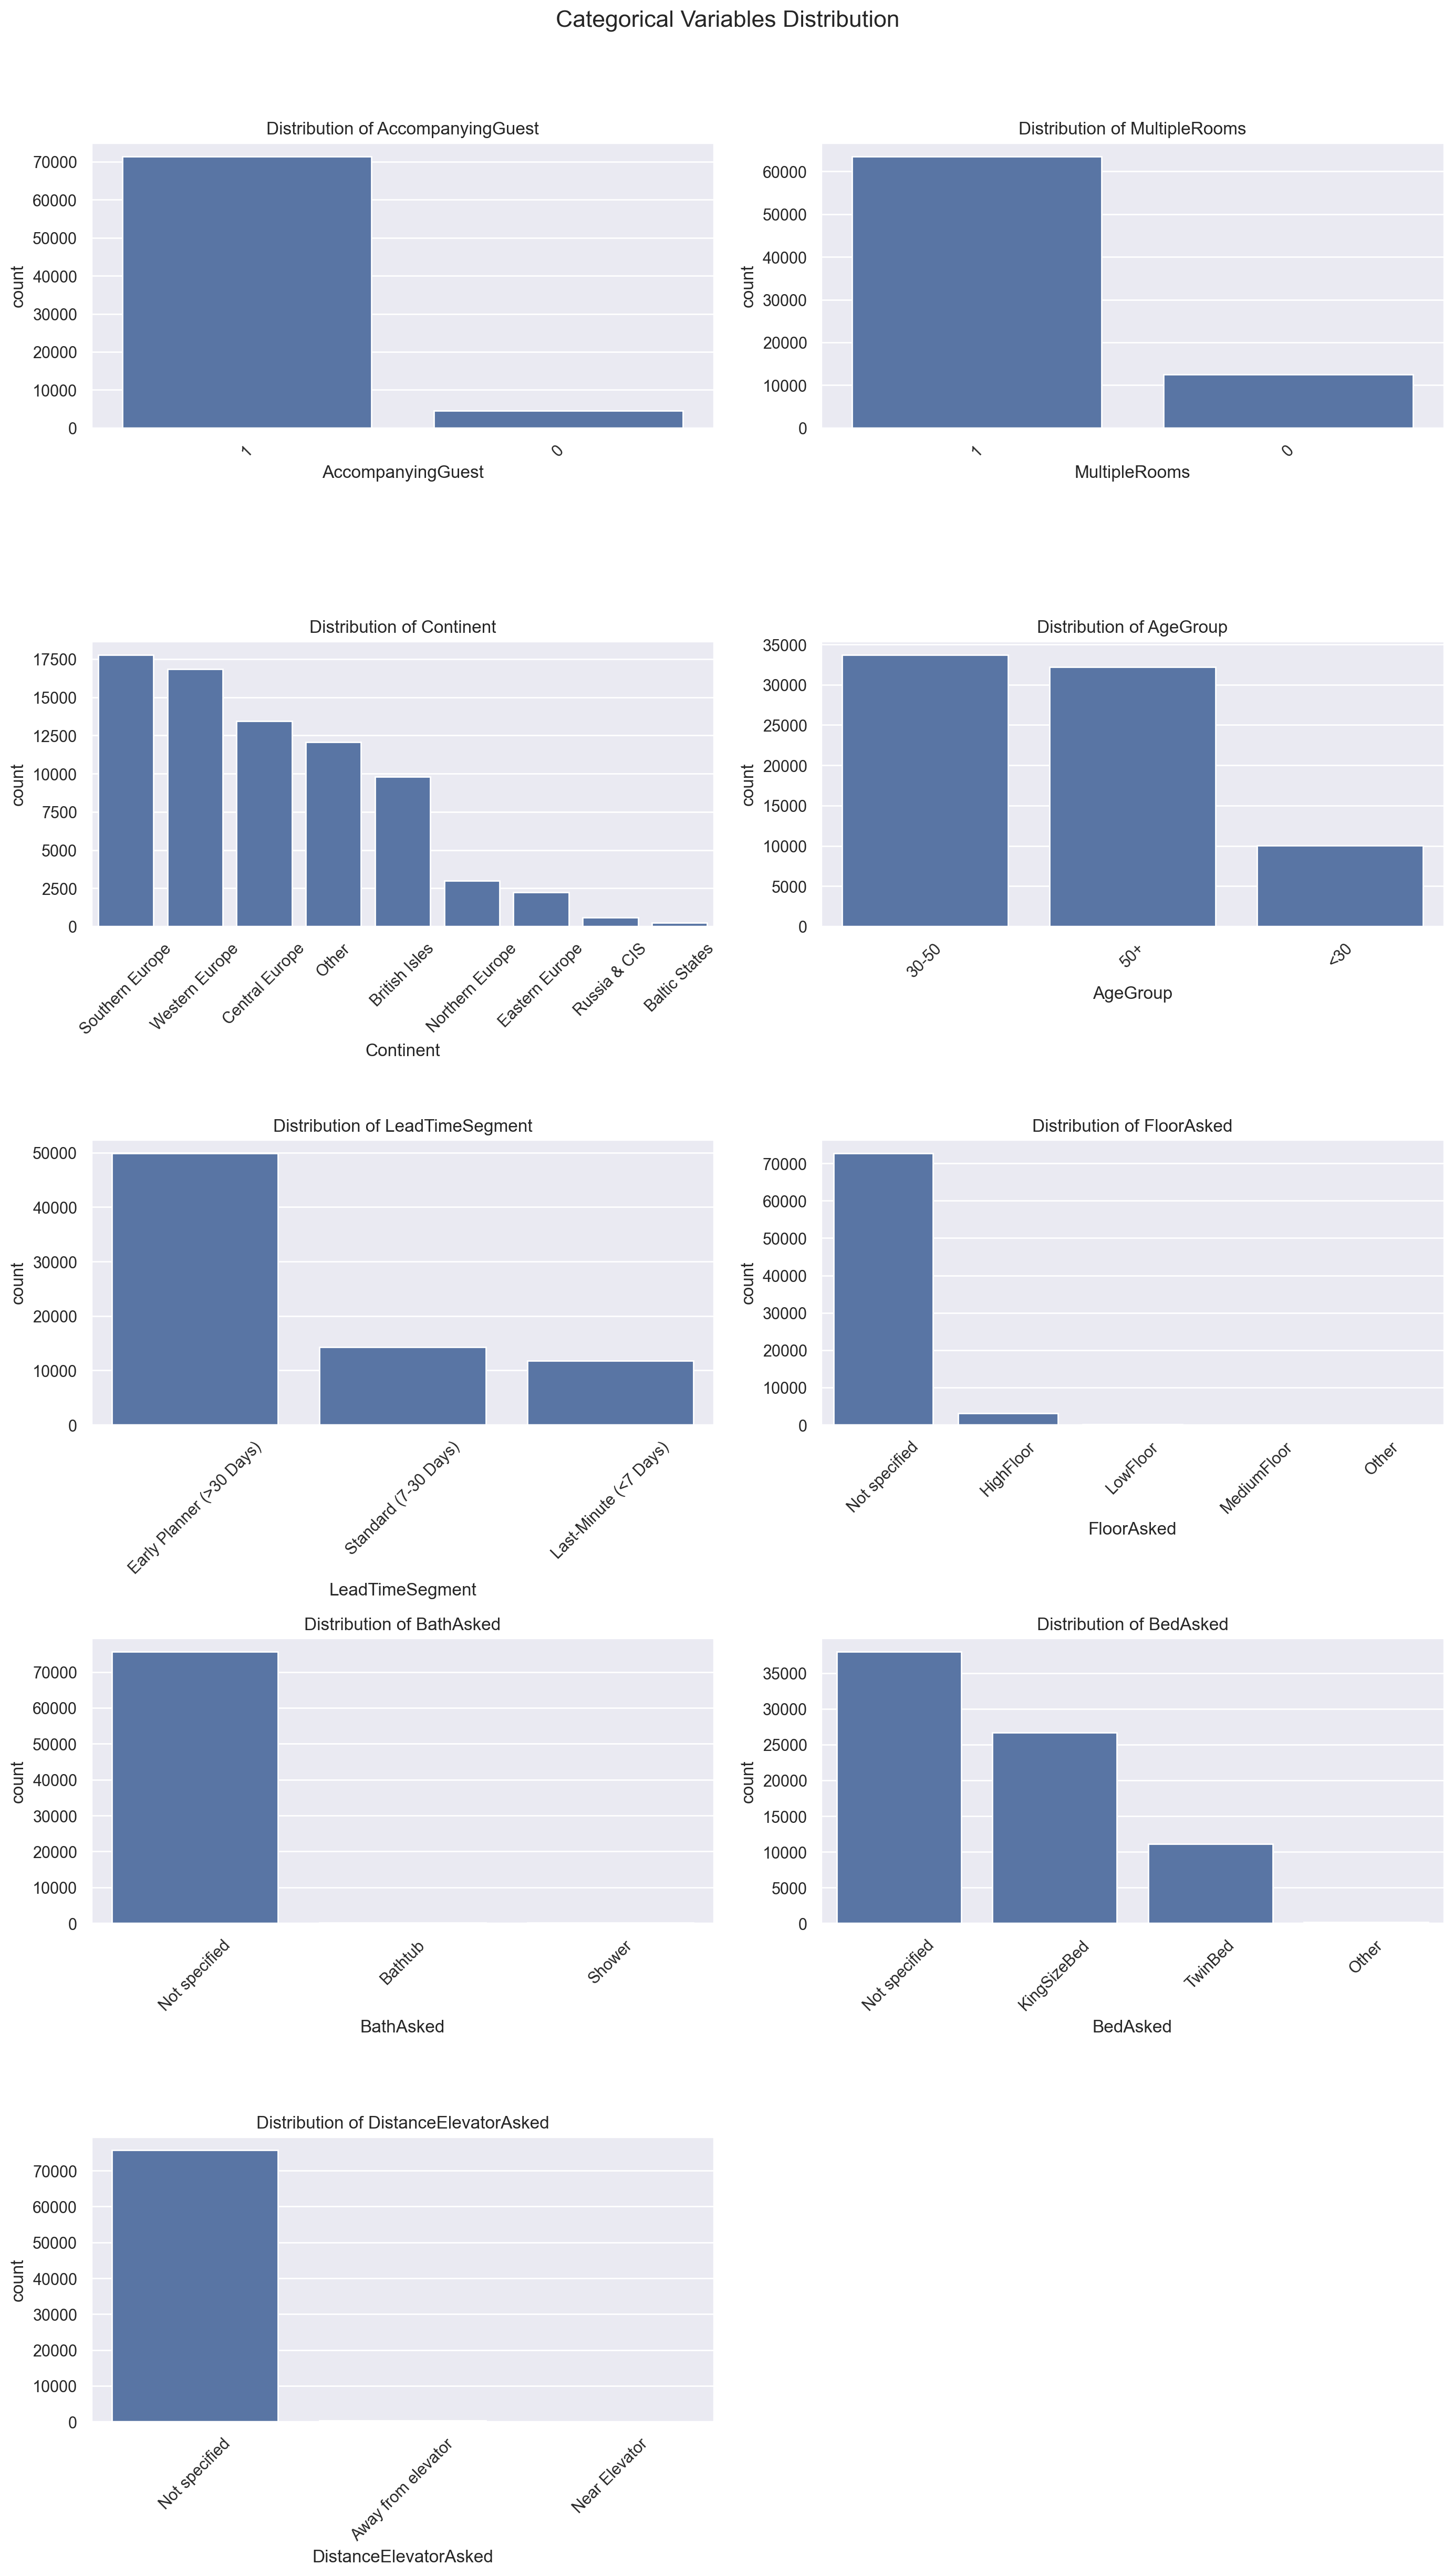

In [35]:
plot_categorical_distributions(X, ['AccompanyingGuest', "MultipleRooms", 'Continent', 'AgeGroup', 'LeadTimeSegment', 'FloorAsked', 'BathAsked', 'BedAsked', 'DistanceElevatorAsked'])

## 4.5 Multivariate Analysis

### Distribution Channel vs Revenue per stay

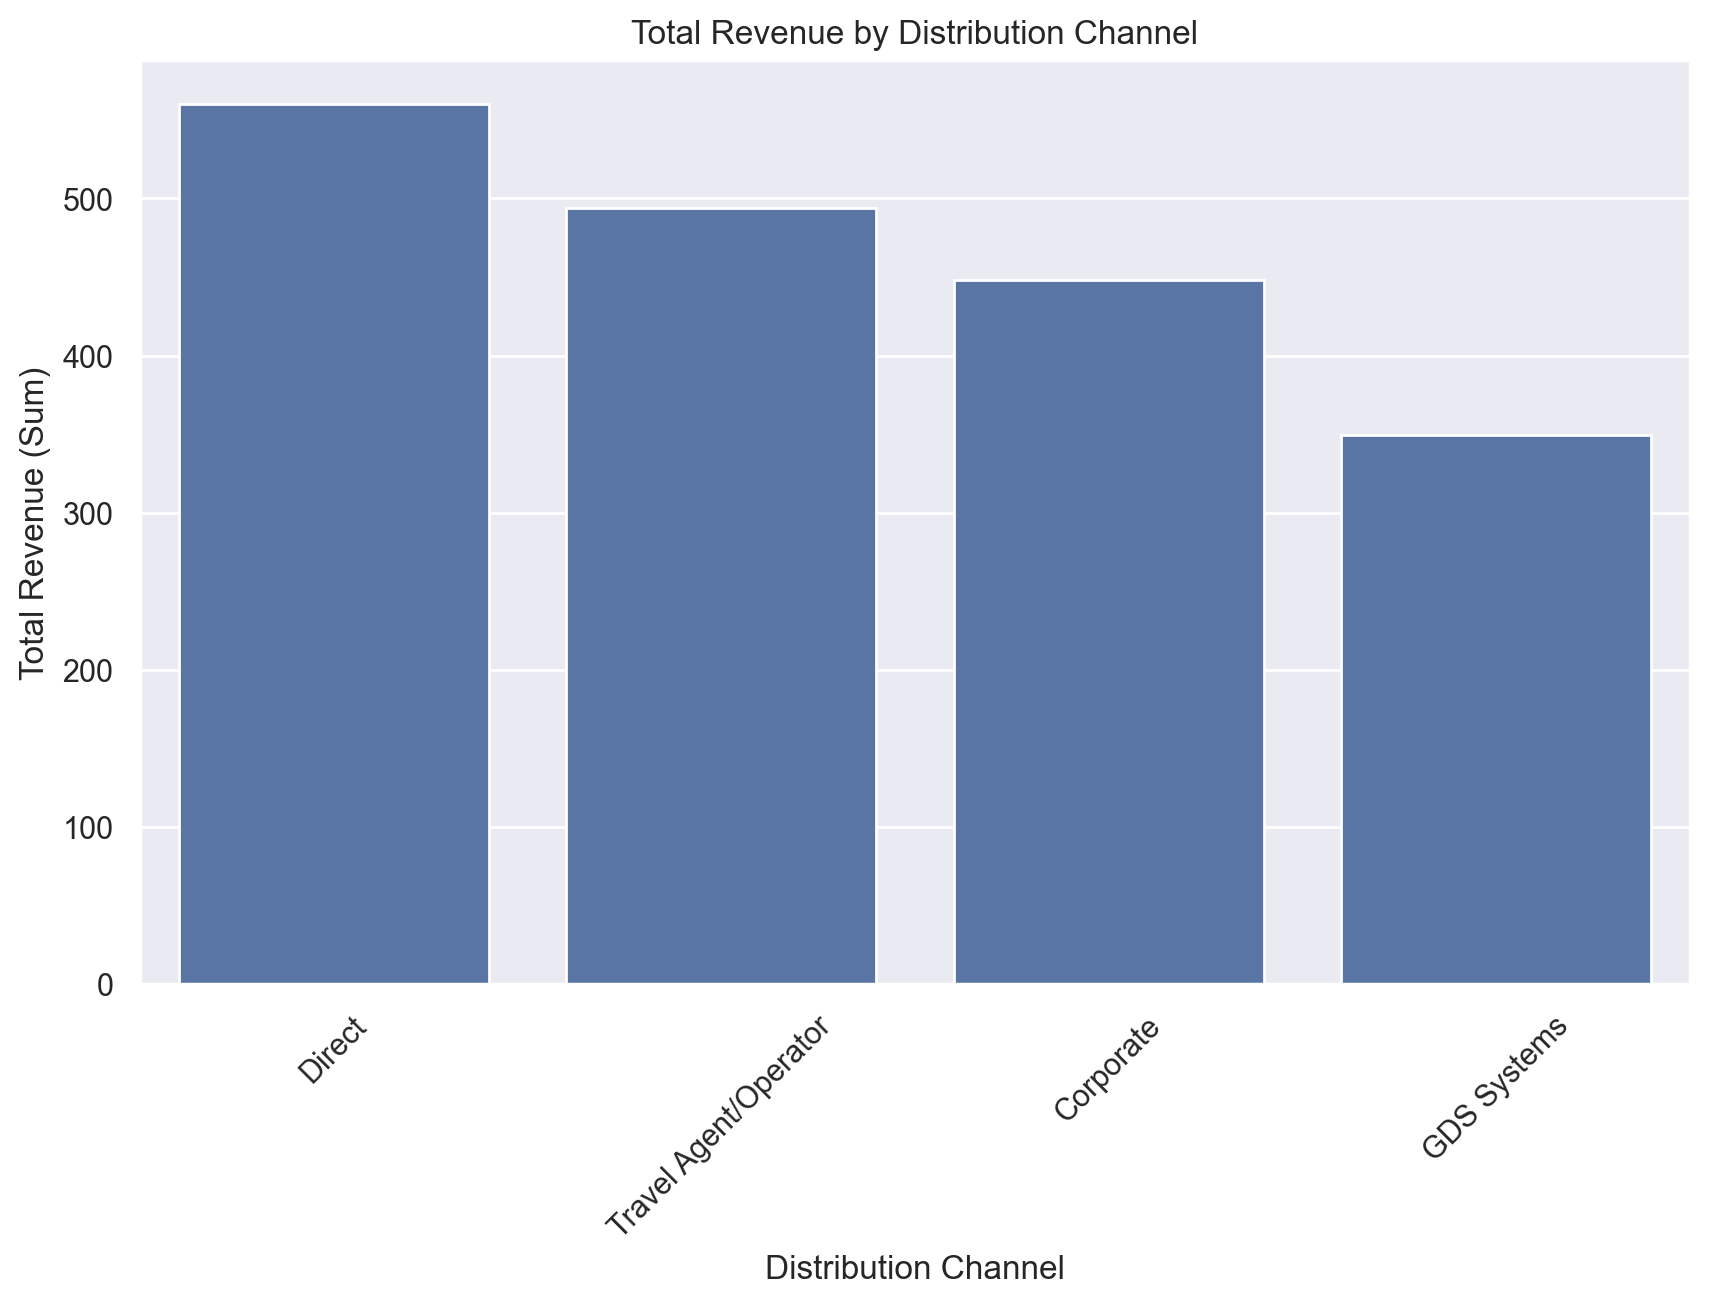

In [36]:
total_revenue_segment = X.groupby("DistributionChannel")["TotalRevenue"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=total_revenue_segment.index, y=total_revenue_segment.values)

plt.xlabel("Distribution Channel")
plt.ylabel("Total Revenue (Sum)")
plt.title("Total Revenue by Distribution Channel")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

### Cancelled/No Show rate per region

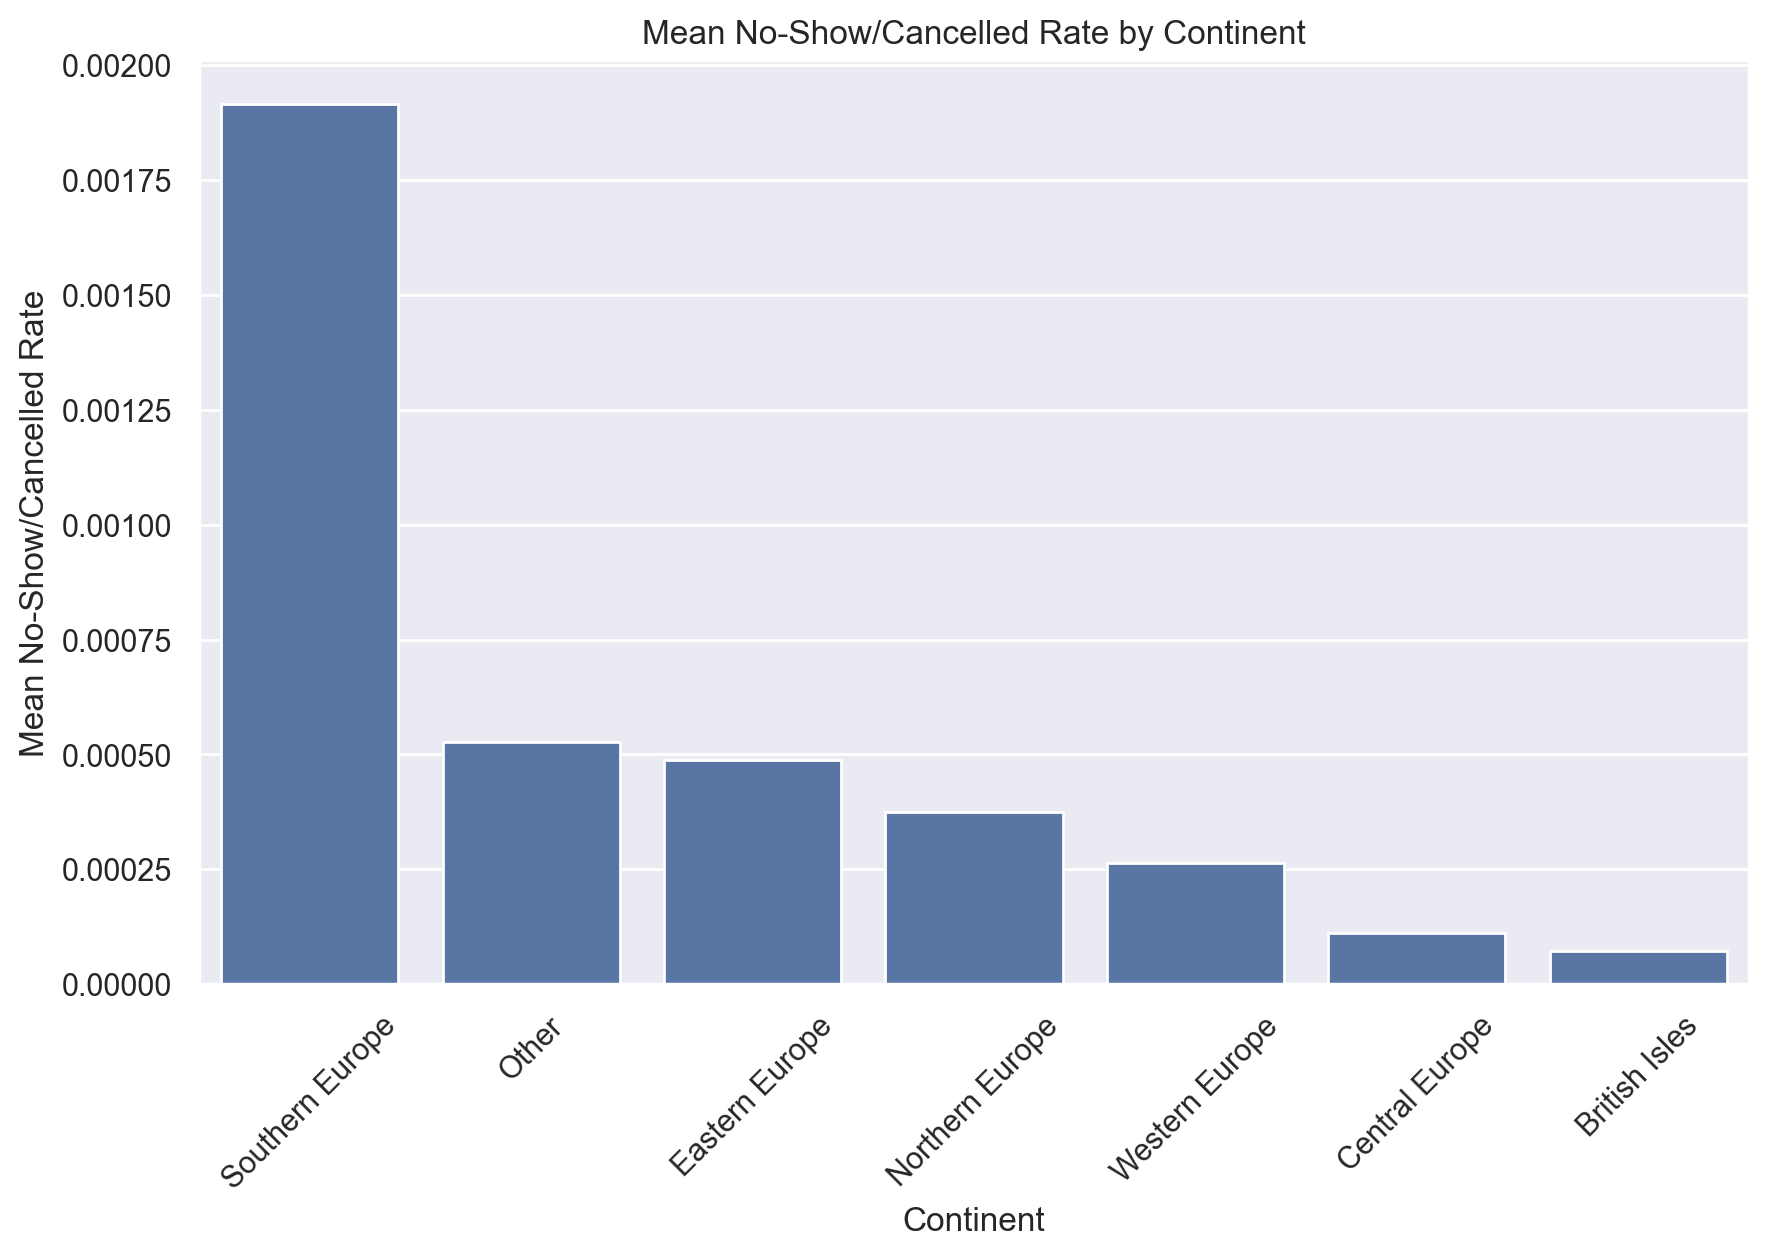

In [37]:
# Calculate the mean of (1 - BookingConversionRate) for each continent
total_noshow = X.groupby("Continent")["BookingConversionRate"].mean()
mean_noshow_rate = 1 - total_noshow  # Compute 1 - mean(BookingConversionRate)

# Filter out regions with very low No-Show Rate (e.g., below 1% of the max)
threshold = mean_noshow_rate.max() * 0.01
filtered_noshow = mean_noshow_rate[mean_noshow_rate > threshold].sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_noshow.index, y=filtered_noshow.values)

plt.xlabel("Continent")
plt.ylabel("Mean No-Show/Cancelled Rate")
plt.title("Mean No-Show/Cancelled Rate by Continent")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

### Revenue for age group

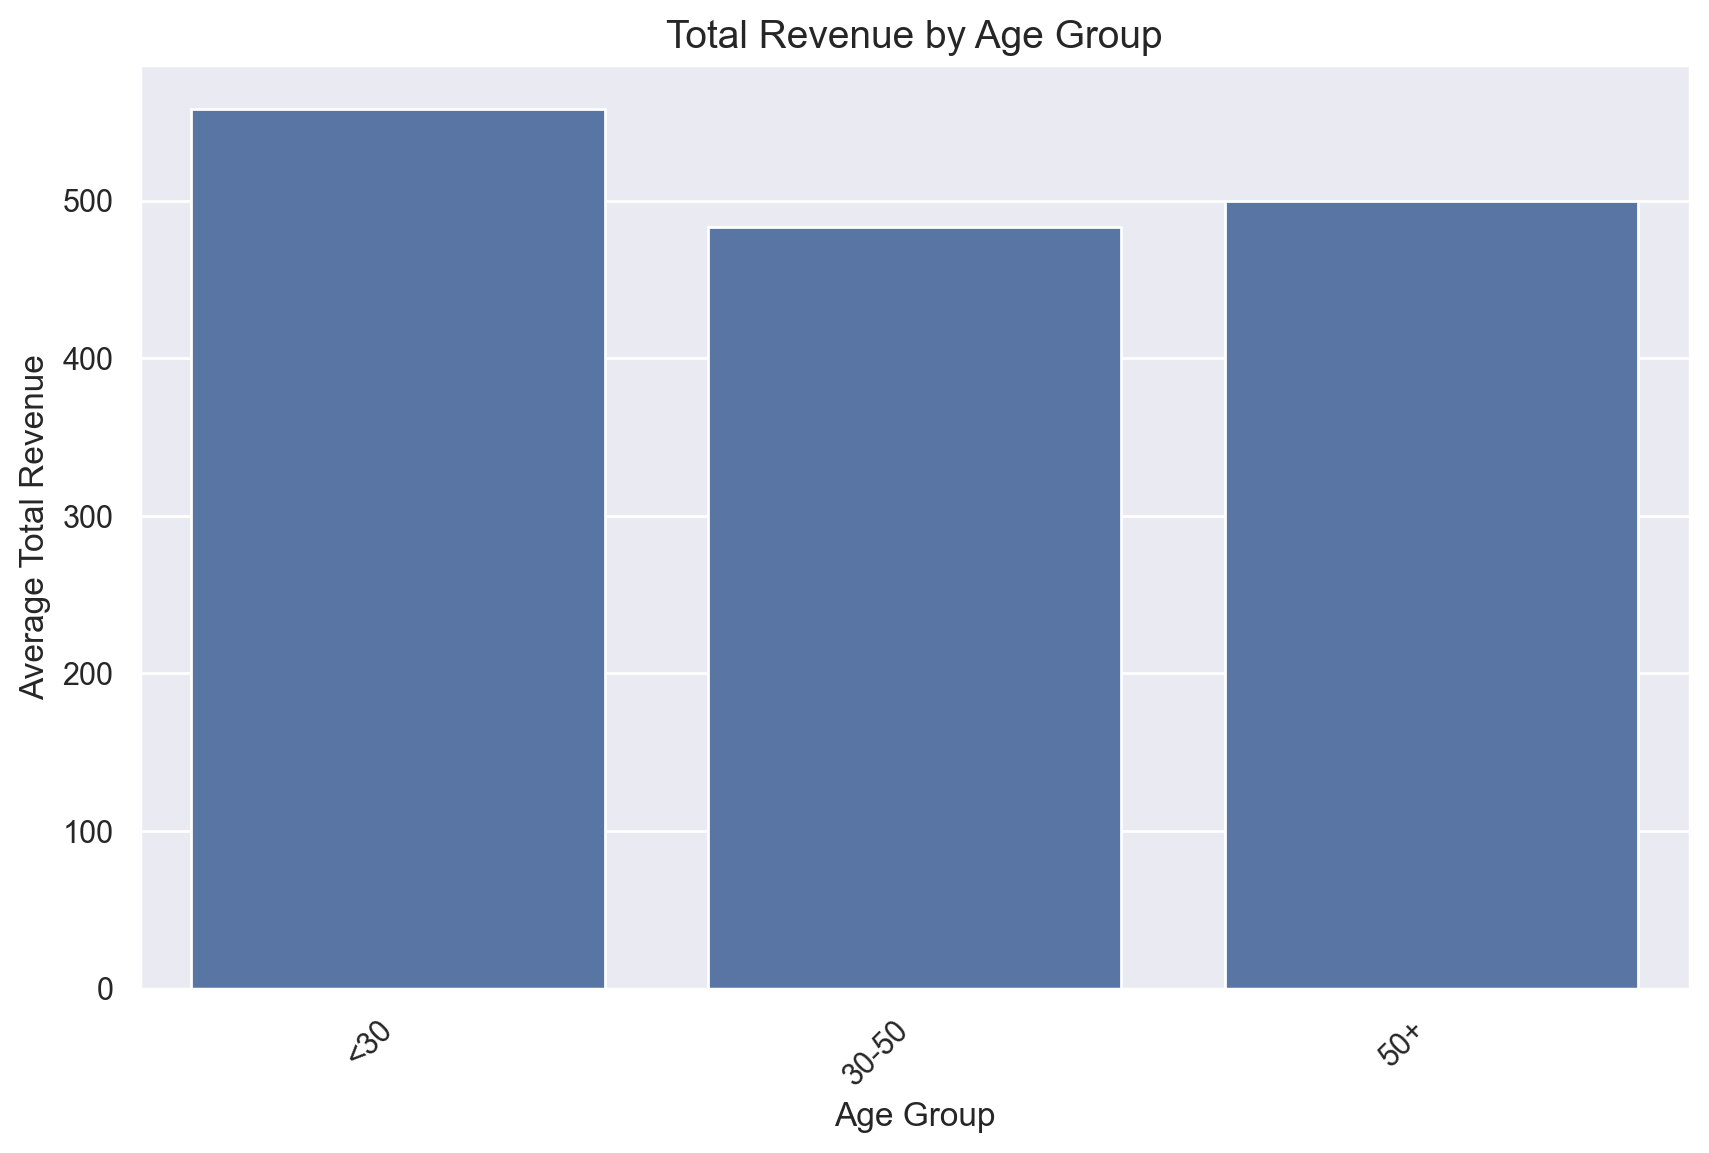

In [38]:
# Calculate mean revenue per age group
age_revenue = X.groupby('AgeGroup', observed=False)['TotalRevenue'].mean()

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.barplot(x=age_revenue.index, y=age_revenue.values)

# Customize chart
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Total Revenue", fontsize=12)
plt.title("Total Revenue by Age Group", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate for better readability

# Show plot
plt.show()

### Total Cancellations and No Shows per Distribution Channel

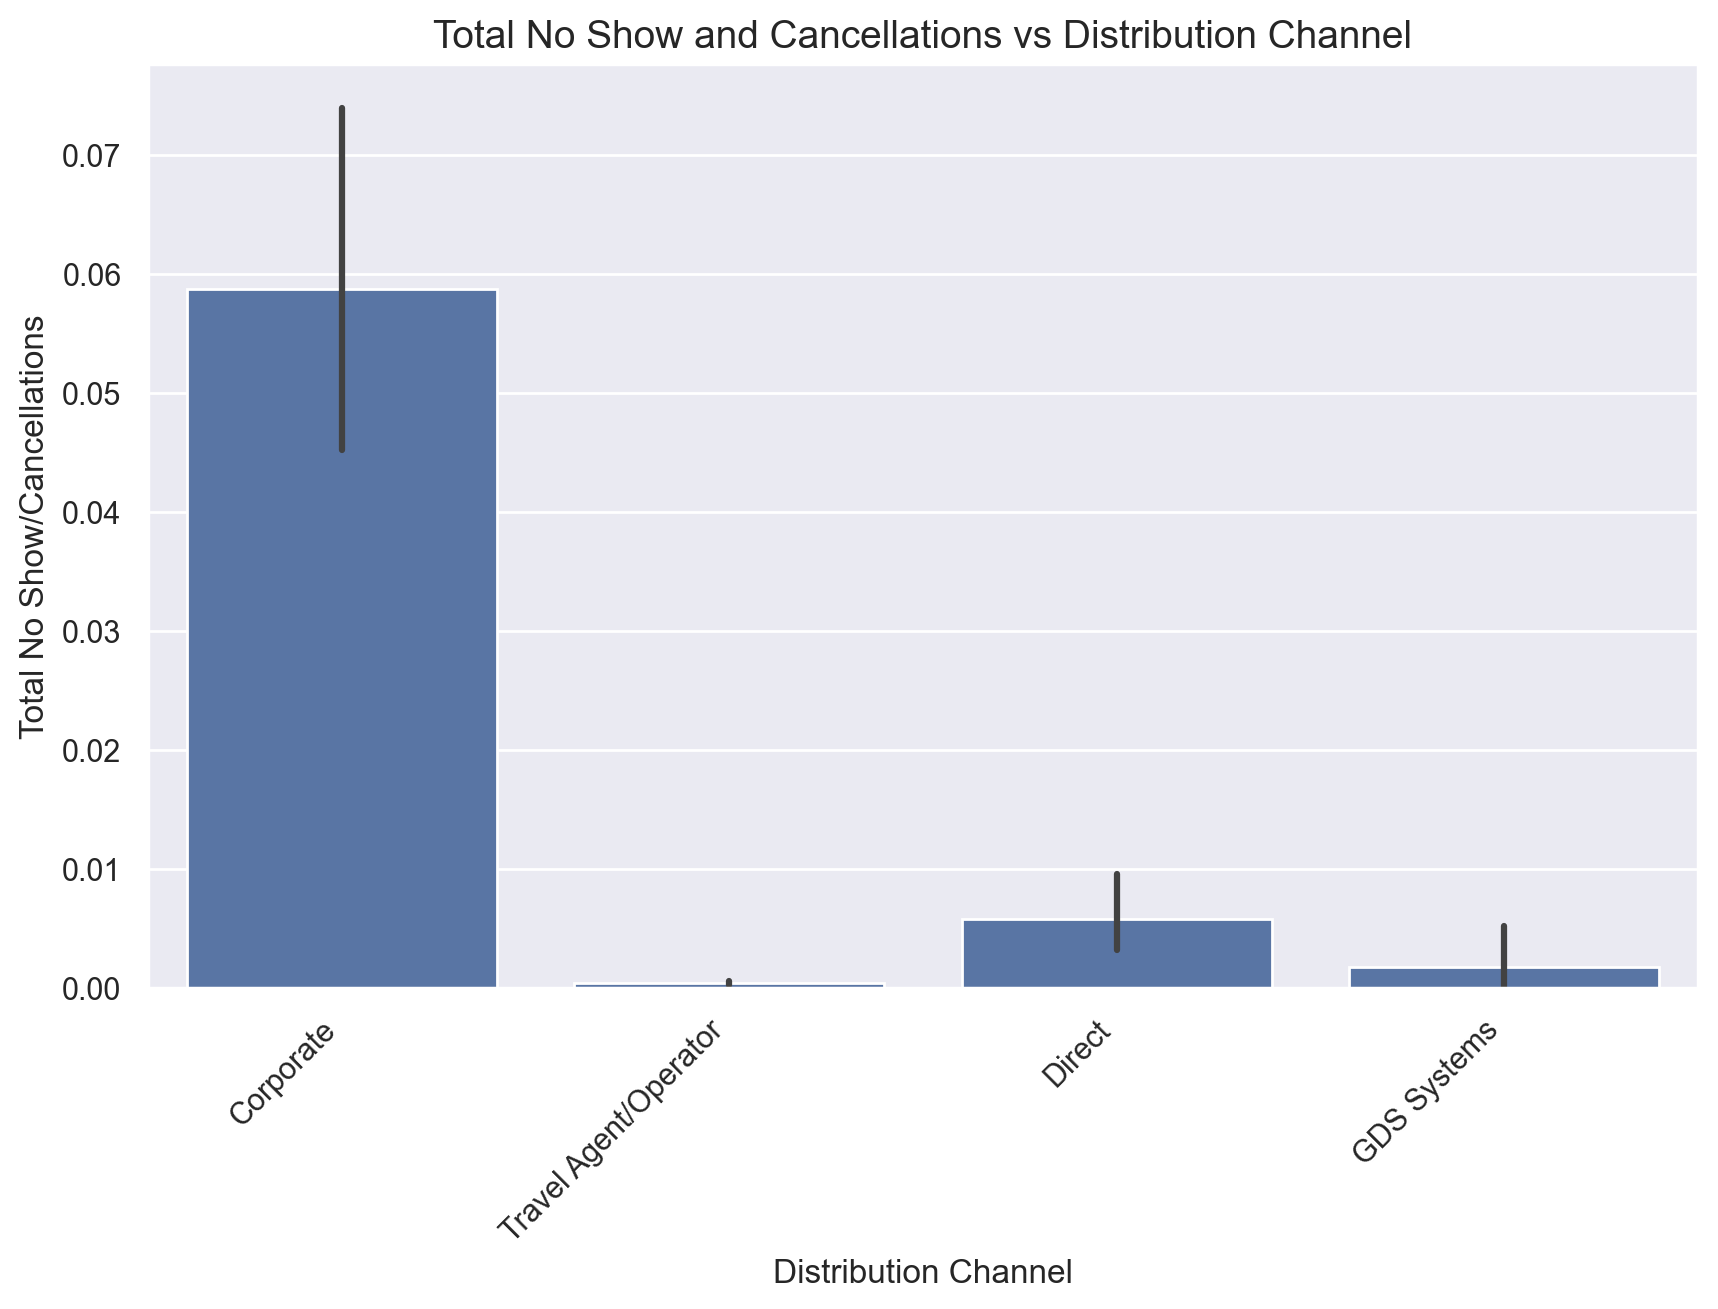

In [39]:
# Create a new column summing canceled and no-show bookings
X["BookingsCancelledAndNoShow"] = X["BookingsCanceled"] + X["BookingsNoShowed"]

# Set figure size
plt.figure(figsize=(10, 6))

# Plot bar chart
sns.barplot(data=X, x='DistributionChannel', y='BookingsCancelledAndNoShow')

# Adding labels and title
plt.title('Total No Show and Cancellations vs Distribution Channel', fontsize=14)
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Total No Show/Cancellations', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show plot
plt.show()

X.drop(columns=["BookingsCancelledAndNoShow"], inplace=True)

### Total Revenue per Accompanying Guest

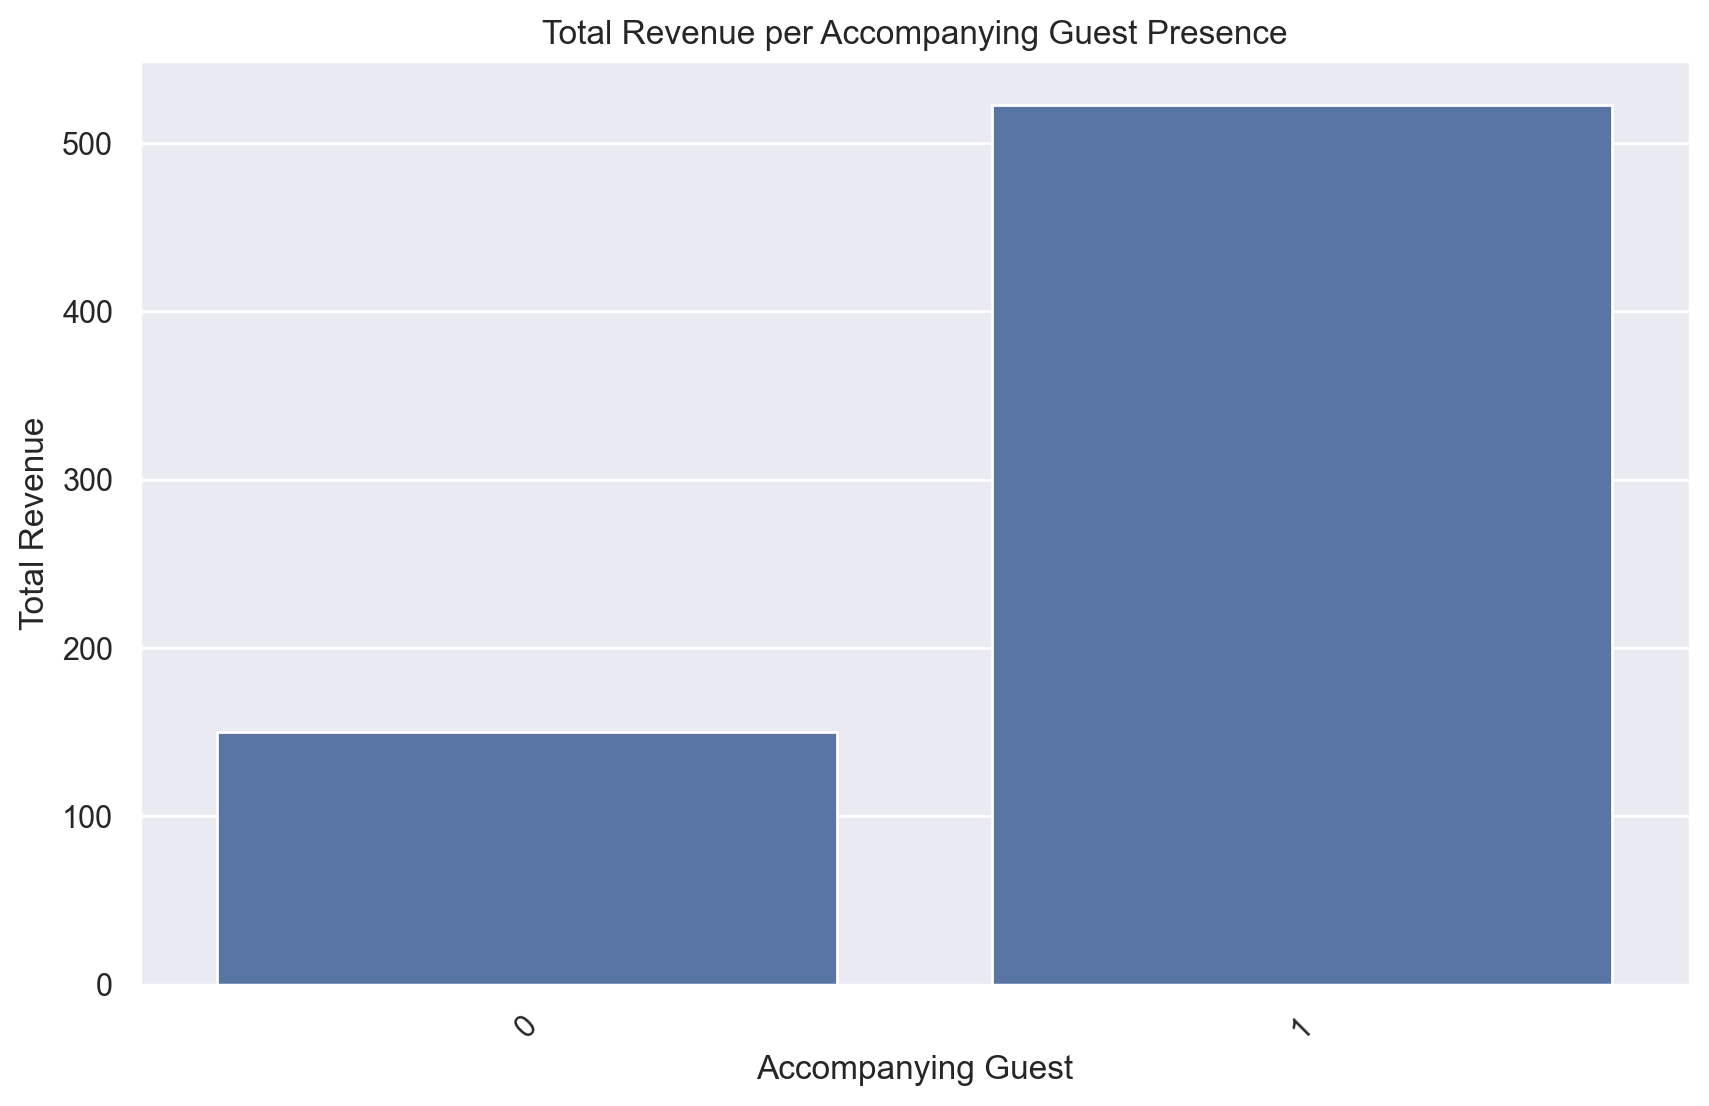

In [40]:
btype_revenue = X.groupby("AccompanyingGuest")["TotalRevenue"].mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=btype_revenue.index, y=btype_revenue.values)

plt.xlabel("Accompanying Guest")
plt.ylabel("Total Revenue")
plt.title("Total Revenue per Accompanying Guest Presence")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

## 4.7 Data Skewness and Log-transformations

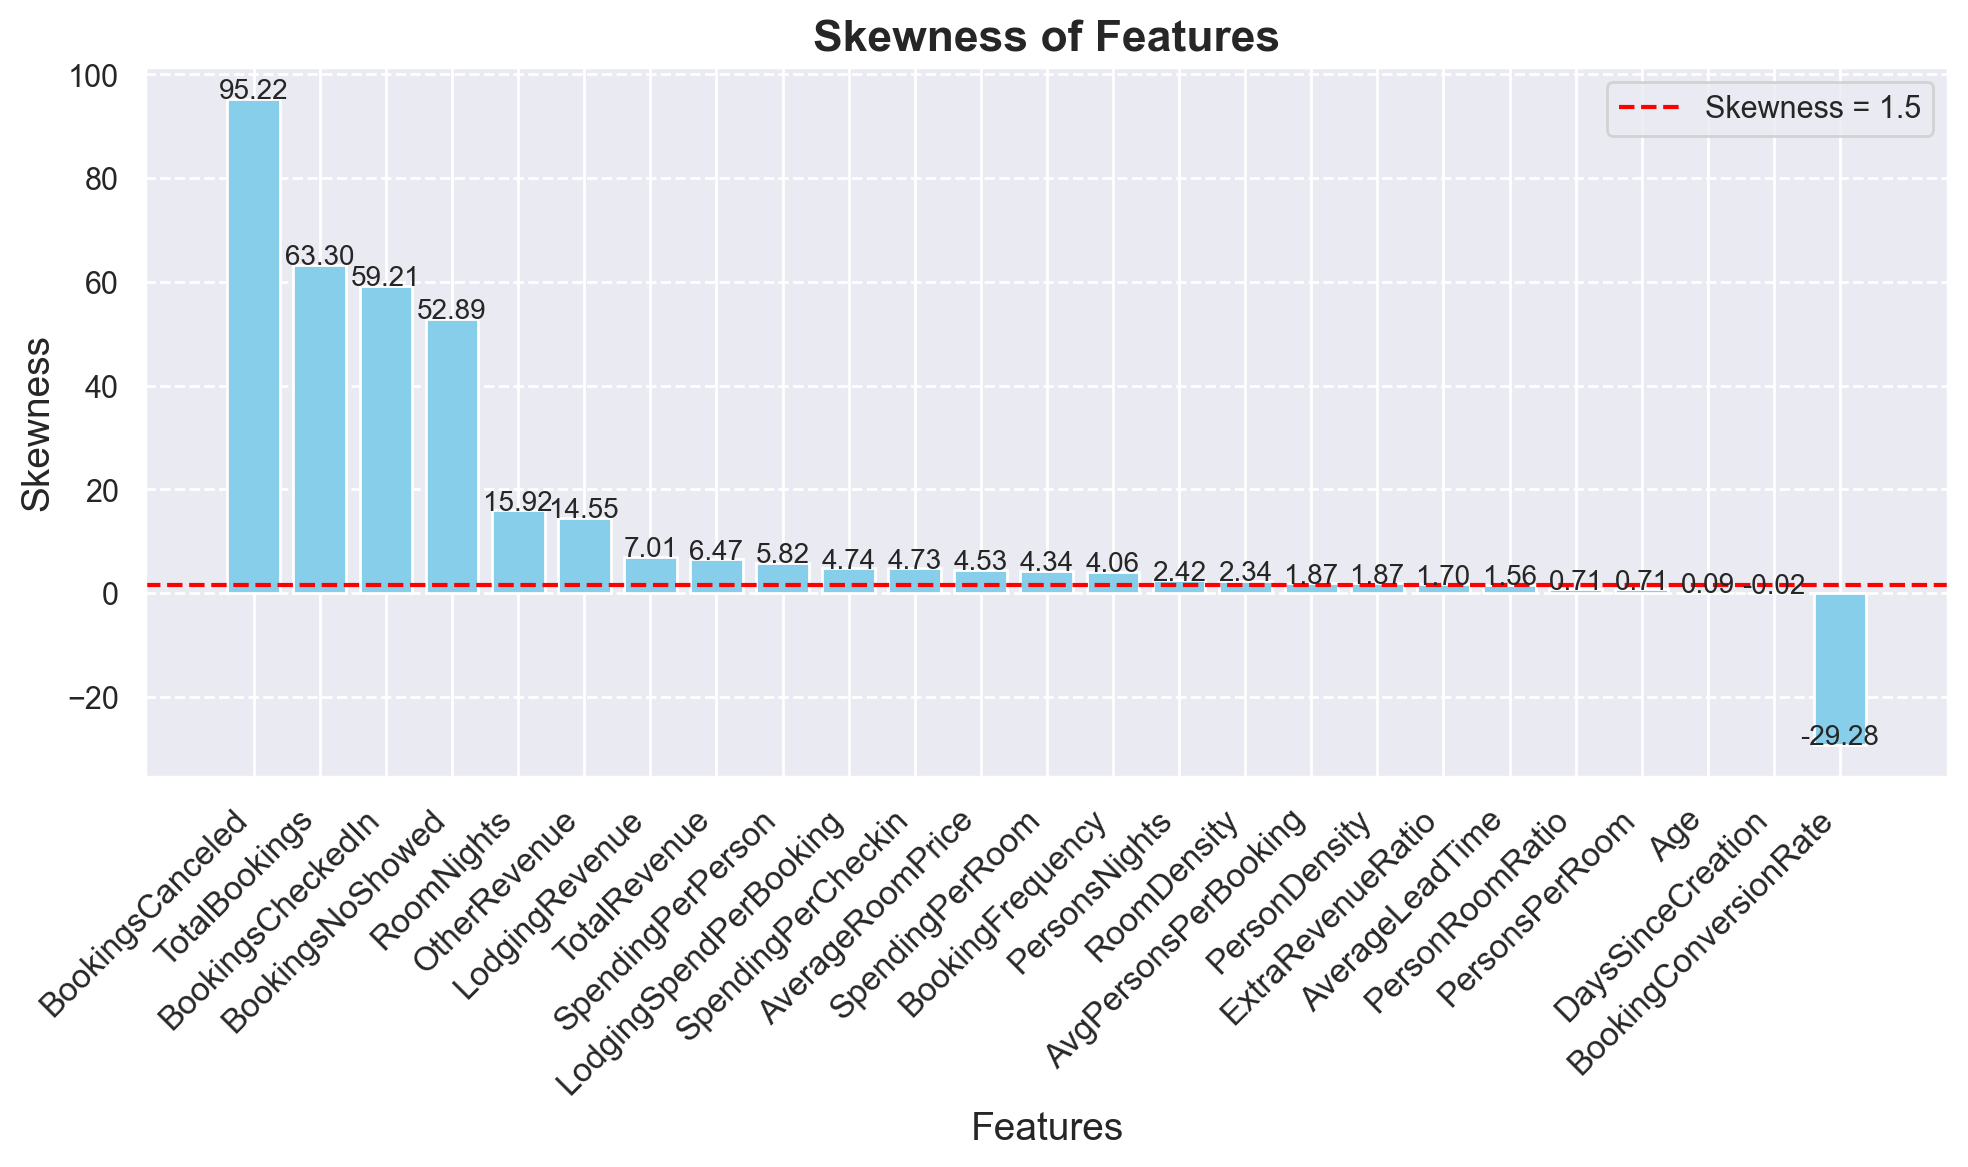

Features with skewness above 1.5: ['BookingsCanceled', 'TotalBookings', 'BookingsCheckedIn', 'BookingsNoShowed', 'RoomNights', 'OtherRevenue', 'LodgingRevenue', 'TotalRevenue', 'SpendingPerPerson', 'LodgingSpendPerBooking', 'SpendingPerCheckin', 'AverageRoomPrice', 'SpendingPerRoom', 'BookingFrequency', 'PersonsNights', 'RoomDensity', 'AvgPersonsPerBooking', 'PersonDensity', 'ExtraRevenueRatio', 'AverageLeadTime']


In [41]:
skewness = X[numerical].apply(lambda x: skew(x, nan_policy='omit'))

sorted_skewness = skewness.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_skewness.index, sorted_skewness, color='skyblue')
plt.axhline(y=1.5, color='red', linestyle='--', label="Skewness = 1.5")
plt.title("Skewness of Features", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Skewness", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=1)
plt.legend()
plt.tight_layout()
plt.show()

high_skew_features = sorted_skewness[sorted_skewness > 1.5].index.tolist()
print(f"Features with skewness above 1.5: {high_skew_features}")

Transforming high skew features into log scale

In [42]:
for column in high_skew_features:
    X[f'{column}_log'] = np.log1p(X[column])
    numerical = numerical + [f'{column}_log']

num_rows = (len(high_skew_features) * 2 + 1) // 2
num_cols = 2

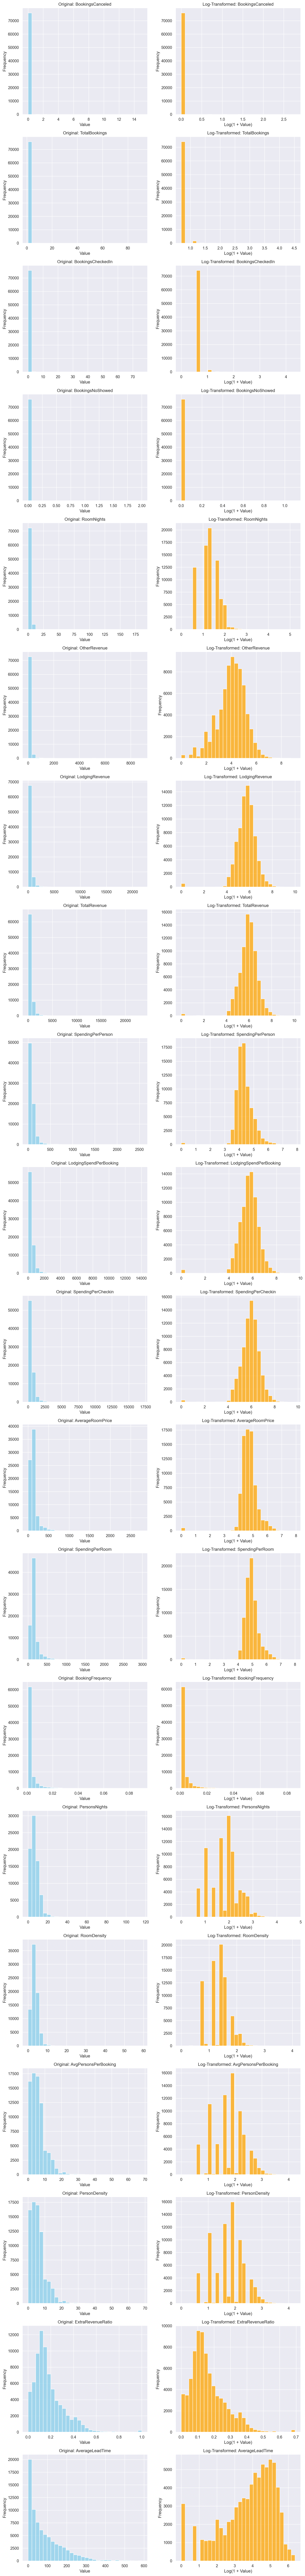

In [43]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, column in enumerate(high_skew_features):
    if i * 2 < len(axes):  # Ensure there are enough axes
        # Plot original column histogram
        sns.histplot(X[column], kde=False, ax=axes[i * 2], color='skyblue', bins=30)
        axes[i * 2].set_title(f"Original: {column}")
        axes[i * 2].set_xlabel("Value")
        axes[i * 2].set_ylabel("Frequency")

        # Plot log-transformed column histogram
        sns.histplot(X[f'{column}_log'], kde=False, ax=axes[i * 2 + 1], color='orange', bins=30)
        axes[i * 2 + 1].set_title(f"Log-Transformed: {column}")
        axes[i * 2 + 1].set_xlabel("Log(1 + Value)")
        axes[i * 2 + 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [44]:
original_skewness = X[high_skew_features].apply(lambda x: skew(x, nan_policy='omit'))

log_skewness = X[[f'{column}_log' for column in high_skew_features]].apply(lambda x: skew(x, nan_policy='omit'))

skew_comparison_original = pd.DataFrame({
    'Skewness': original_skewness
})

skew_comparison_log = pd.DataFrame({
    'Skewness after log': log_skewness
})

skew_comparison_original.reset_index(inplace=True)
skew_comparison_log.reset_index(inplace=True)

skew_comparison_original.rename(columns={'index': 'Feature'}, inplace=True)
skew_comparison_log.rename(columns={'index': 'Feature log'}, inplace=True)

skew_comparison = pd.concat([skew_comparison_original, skew_comparison_log], axis=1)

skew_comparison.drop(columns=['Feature log'], inplace=True)

skew_comparison

Feature   Skewness  Skewness after log
0         BookingsCanceled  95.223881           32.068605
1            TotalBookings  63.296970           12.850426
2        BookingsCheckedIn  59.206257           12.838955
3         BookingsNoShowed  52.893109           48.064934
4               RoomNights  15.915956            0.176188
5             OtherRevenue  14.546808           -0.502877
6           LodgingRevenue   7.009543           -1.787330
7             TotalRevenue   6.465218           -1.542553
8        SpendingPerPerson   5.818550           -1.061501
9   LodgingSpendPerBooking   4.739557           -1.825597
10      SpendingPerCheckin   4.734440           -1.597505
11        AverageRoomPrice   4.527675           -2.503862
12         SpendingPerRoom   4.338702           -2.373780
13        BookingFrequency   4.061976            3.996356
14           PersonsNights   2.418131           -0.065968
15             RoomDensity   2.340840            0.060780
16    AvgPersonsPerBooking   1.874171           -0.067713
17           PersonDensity   1.870613           -0.070854
18       ExtraRevenueRatio   1.701017            1.205698
19         AverageLeadTime   1.557534           -0.856424

In [45]:
for var in high_skew_features:
    numerical.remove(var)
    X.drop(columns=[var], inplace=True)

## Feature Engineering

In [46]:
# Define Spending Tier limits using percentiles
percentiles = X['TotalRevenue_log'].quantile([0, 0.5, 1]).values  # Adjusting for right-skewed distribution

spending_tier_bins = [percentiles[0], percentiles[1], percentiles[2]]
spending_tier_labels = ['Low Spender', 'High Spender']

# Create Spending Tier feature using percentiles
X['SpendingTier'] = pd.cut(X['TotalRevenue_log'],
                           bins=spending_tier_bins,
                           labels=spending_tier_labels,
                           include_lowest=True)  # Ensures 0 is included in 'Low Spender'

categorical = categorical + ['SpendingTier']

In [47]:
def correlation_pairs(data, variables, threshold):
    correlation_matrix = data[variables].corr()

    # Get the absolute values of the correlation matrix
    abs_corr_matrix = correlation_matrix.abs()

    # Identify pairs with high correlation, avoiding duplicates by only considering the upper triangular matrix
    high_corr_pairs = [
        (feature_1, feature_2, float(abs_corr_matrix.loc[feature_1, feature_2]))
        for i, feature_1 in enumerate(abs_corr_matrix.columns)
        for j, feature_2 in enumerate(abs_corr_matrix.columns)
        if i < j and abs_corr_matrix.loc[feature_1, feature_2] > threshold
    ]

    return high_corr_pairs

correlation_pairs(X, numerical, 0.75)

[('PersonsPerRoom', 'PersonRoomRatio', 1.0),
 ('TotalBookings_log', 'BookingsCheckedIn_log', 0.9897147013661534),
 ('RoomNights_log', 'PersonsNights_log', 0.8675088606827402),
 ('RoomNights_log', 'RoomDensity_log', 0.959290052075505),
 ('RoomNights_log', 'AvgPersonsPerBooking_log', 0.8269594642809942),
 ('RoomNights_log', 'PersonDensity_log', 0.8256708955360967),
 ('LodgingRevenue_log', 'TotalRevenue_log', 0.9600543749452295),
 ('LodgingRevenue_log', 'LodgingSpendPerBooking_log', 0.9850813890431945),
 ('LodgingRevenue_log', 'SpendingPerCheckin_log', 0.9459582884389085),
 ('TotalRevenue_log', 'LodgingSpendPerBooking_log', 0.9445765214959005),
 ('TotalRevenue_log', 'SpendingPerCheckin_log', 0.984548565278785),
 ('SpendingPerPerson_log', 'AverageRoomPrice_log', 0.7895316948572844),
 ('SpendingPerPerson_log', 'SpendingPerRoom_log', 0.8130309243730293),
 ('LodgingSpendPerBooking_log', 'SpendingPerCheckin_log', 0.9603333224869971),
 ('AverageRoomPrice_log', 'SpendingPerRoom_log', 0.934736568

In [48]:
X.drop(columns= ['Age',
 'DaysSinceCreation',
 'PersonsPerRoom',
 'BookingsCanceled_log',
 'TotalBookings_log',
 'BookingsCheckedIn_log',
 'BookingsNoShowed_log',
 'RoomNights_log',
 'LodgingRevenue_log',
 'LodgingSpendPerBooking_log',
 'SpendingPerCheckin_log',
 'AverageRoomPrice_log',
 'SpendingPerRoom_log',
 'BookingFrequency_log',
 'RoomDensity_log',
 'PersonDensity_log',
 'ExtraRevenueRatio_log',
 'AverageLeadTime_log'], axis=1, inplace=True)

numerical = [x for x in numerical if x not in ['Age',
 'DaysSinceCreation',
 'PersonsPerRoom',
 'BookingsCanceled_log',
 'TotalBookings_log',
 'BookingsCheckedIn_log',
 'BookingsNoShowed_log',
 'RoomNights_log',
 'LodgingRevenue_log',
 'LodgingSpendPerBooking_log',
 'SpendingPerCheckin_log',
 'AverageRoomPrice_log',
 'SpendingPerRoom_log',
 'BookingFrequency_log',
 'RoomDensity_log',
 'PersonDensity_log',
 'ExtraRevenueRatio_log',
 'AverageLeadTime_log']]

In [49]:
correlation_pairs(X, numerical, 0.75)

[('PersonsNights_log', 'AvgPersonsPerBooking_log', 0.9784581533048525)]

### Correlation matrix

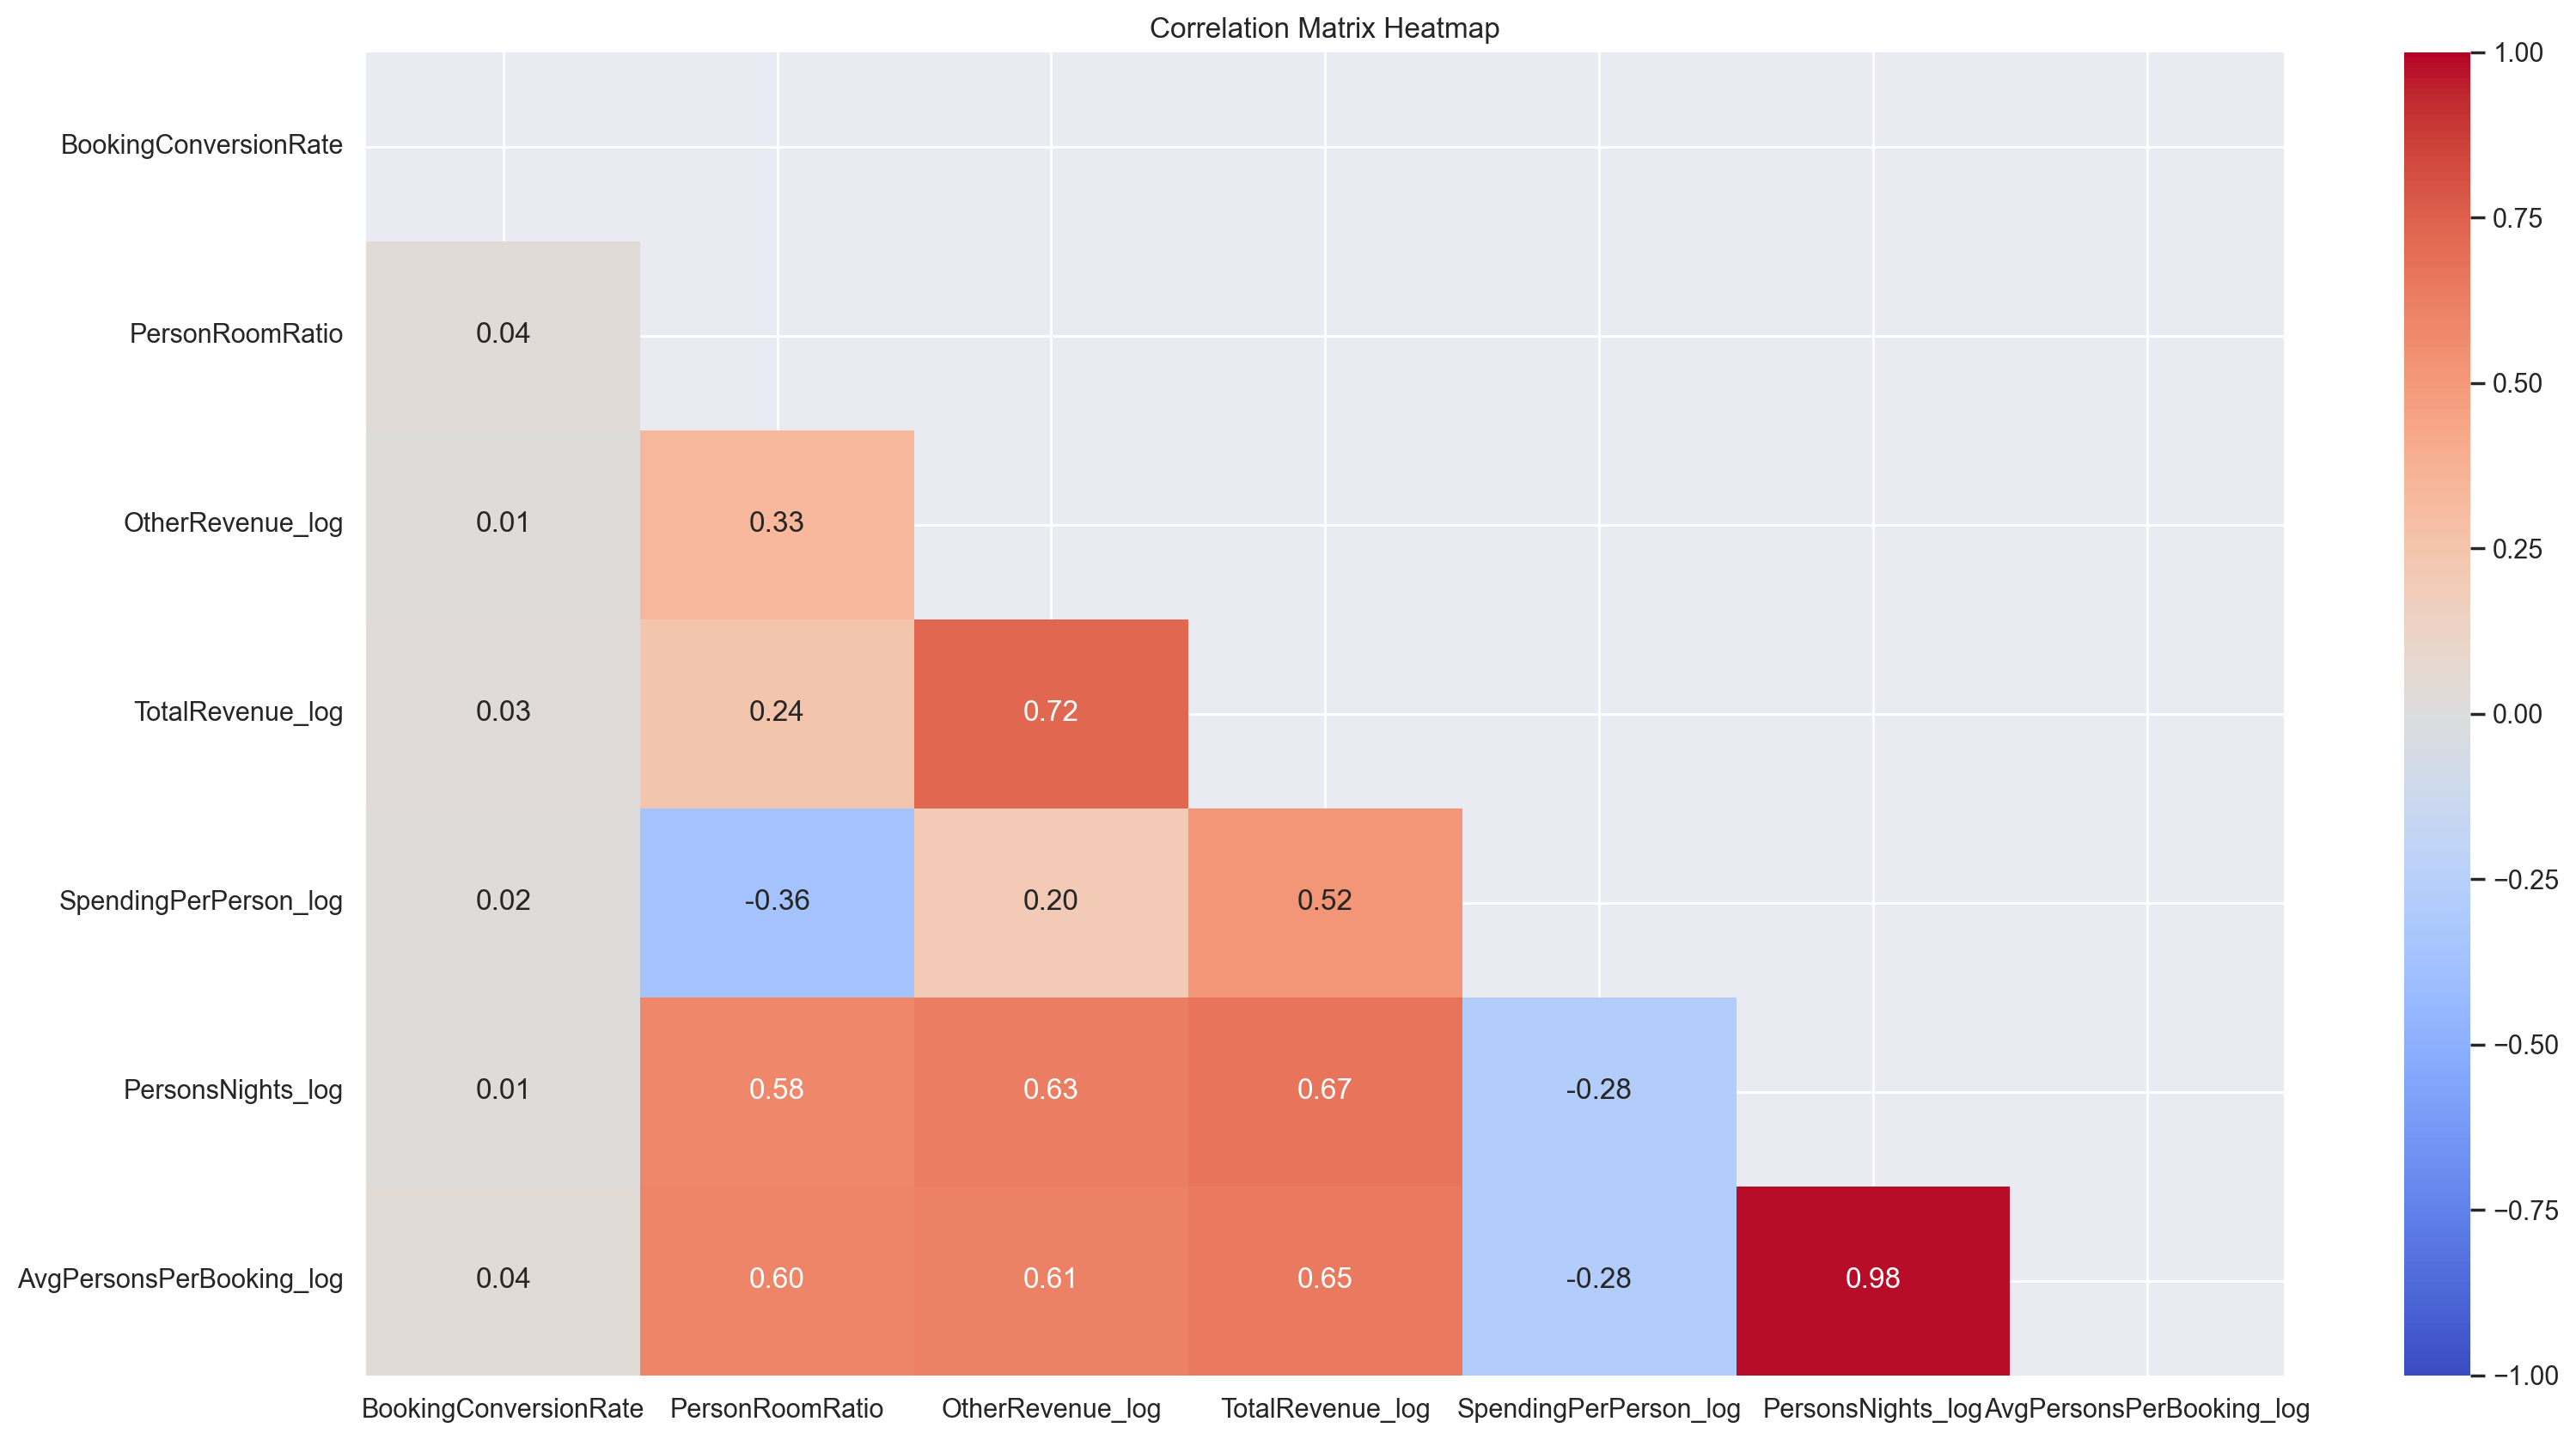

In [50]:
correlation_matrix = X[numerical].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(18, 10))  # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

Updating list of variables and dataset

In [51]:
high_skew_features

['BookingsCanceled',
 'TotalBookings',
 'BookingsCheckedIn',
 'BookingsNoShowed',
 'RoomNights',
 'OtherRevenue',
 'LodgingRevenue',
 'TotalRevenue',
 'SpendingPerPerson',
 'LodgingSpendPerBooking',
 'SpendingPerCheckin',
 'AverageRoomPrice',
 'SpendingPerRoom',
 'BookingFrequency',
 'PersonsNights',
 'RoomDensity',
 'AvgPersonsPerBooking',
 'PersonDensity',
 'ExtraRevenueRatio',
 'AverageLeadTime']

In [52]:
for var in high_skew_features:
    if var in numerical:
        numerical.remove(var)
        X.drop(columns=[var], inplace=True)

## 4.8 Outlier Removal with Transformed Outliers

c:\Users\Elcano\Documents\NOVA IMS\2º Semester\Business Cases with Data Science\Practical\Case 1\Final\functions.py:204: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



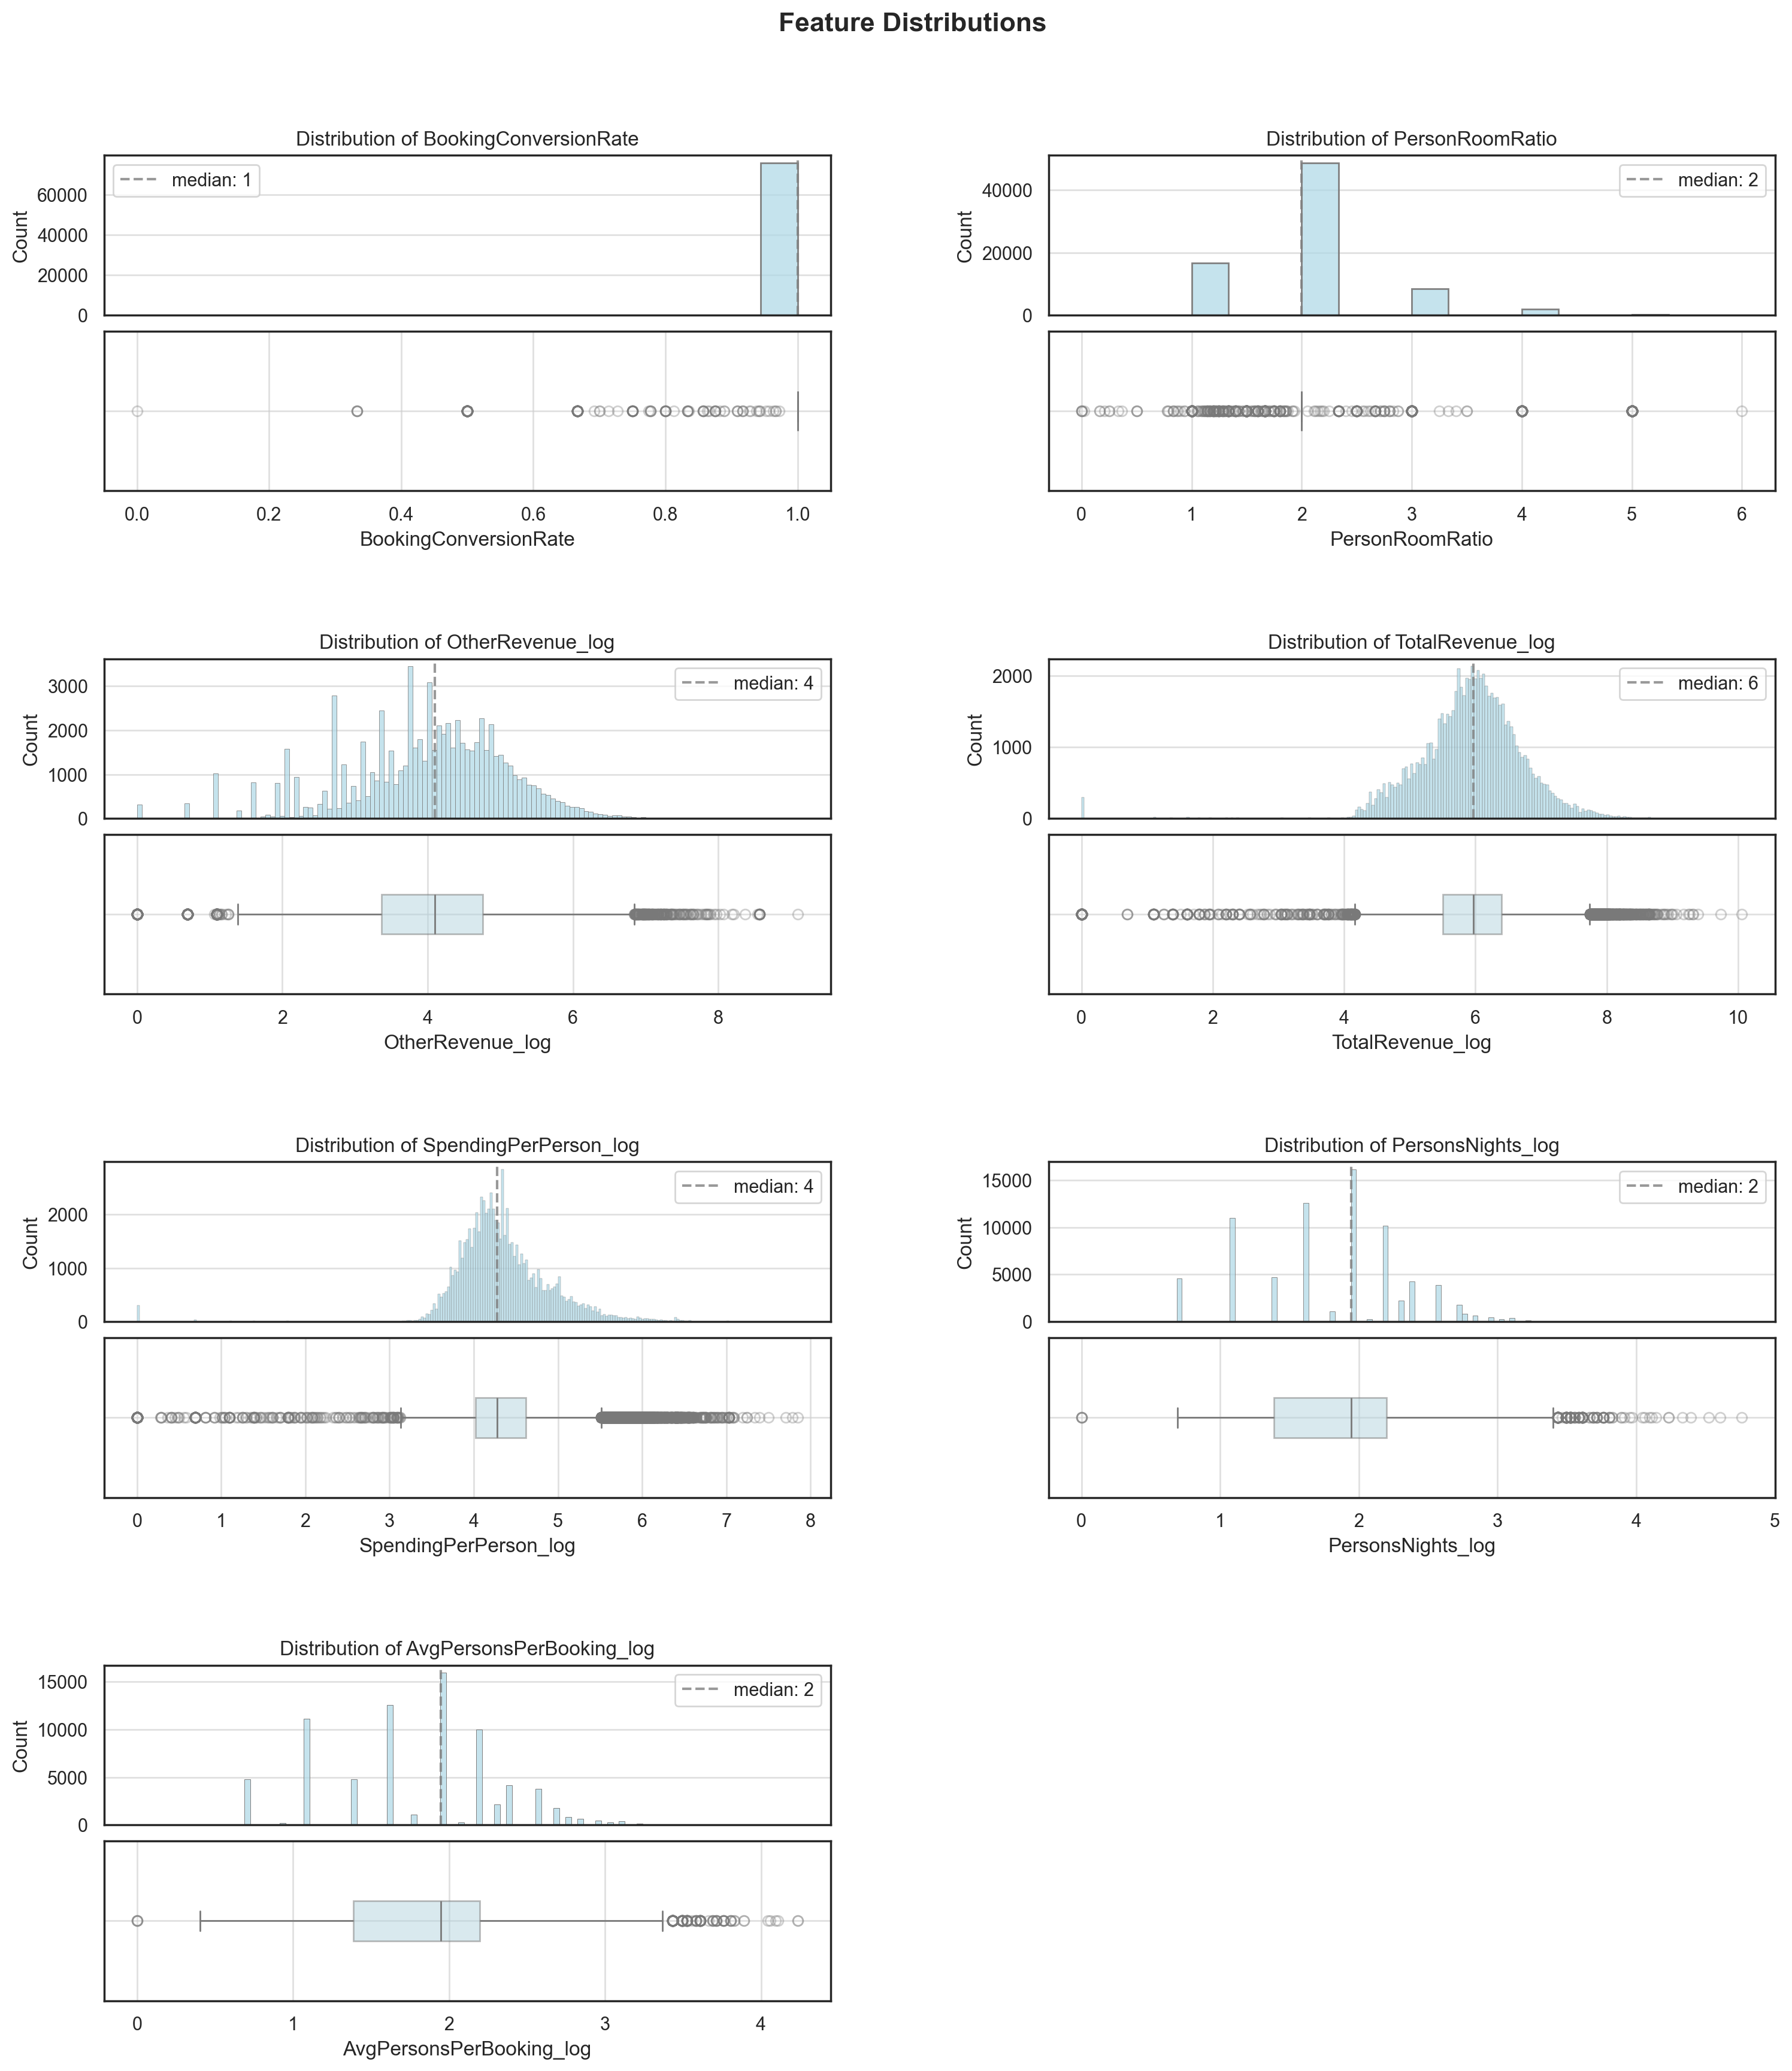

In [53]:
plot_distribution_grid(X, numerical)

### 4.8.1 Outlier Removal of Existing Variables

Columns with right outliers (percentile): ['PersonRoomRatio']
Columns with right outliers (IQR): ['OtherRevenue_log', 'TotalRevenue_log', 'SpendingPerPerson_log', 'PersonsNights_log']
Columns with left outliers (IQR): ['BookingConversionRate', 'PersonRoomRatio', 'TotalRevenue_log', 'SpendingPerPerson_log']
Columns with left outliers (percentile): []
Upper Bound for OtherRevenue_log: 8.9296776020636
Lower Bound for OtherRevenue_log: -0.8044904990713708
--------------------------------------------------
Upper Bound for TotalRevenue_log: 9.085035173438197
Lower Bound for TotalRevenue_log: 2.8205538078029875
--------------------------------------------------
Upper Bound for SpendingPerPerson_log: 6.405606093136079
Lower Bound for SpendingPerPerson_log: 2.2401608889344526
--------------------------------------------------
Upper Bound for PersonsNights_log: 4.630015225985206
Lower Bound for PersonsNights_log: -1.0464962875290962
--------------------------------------------------
Rows removed

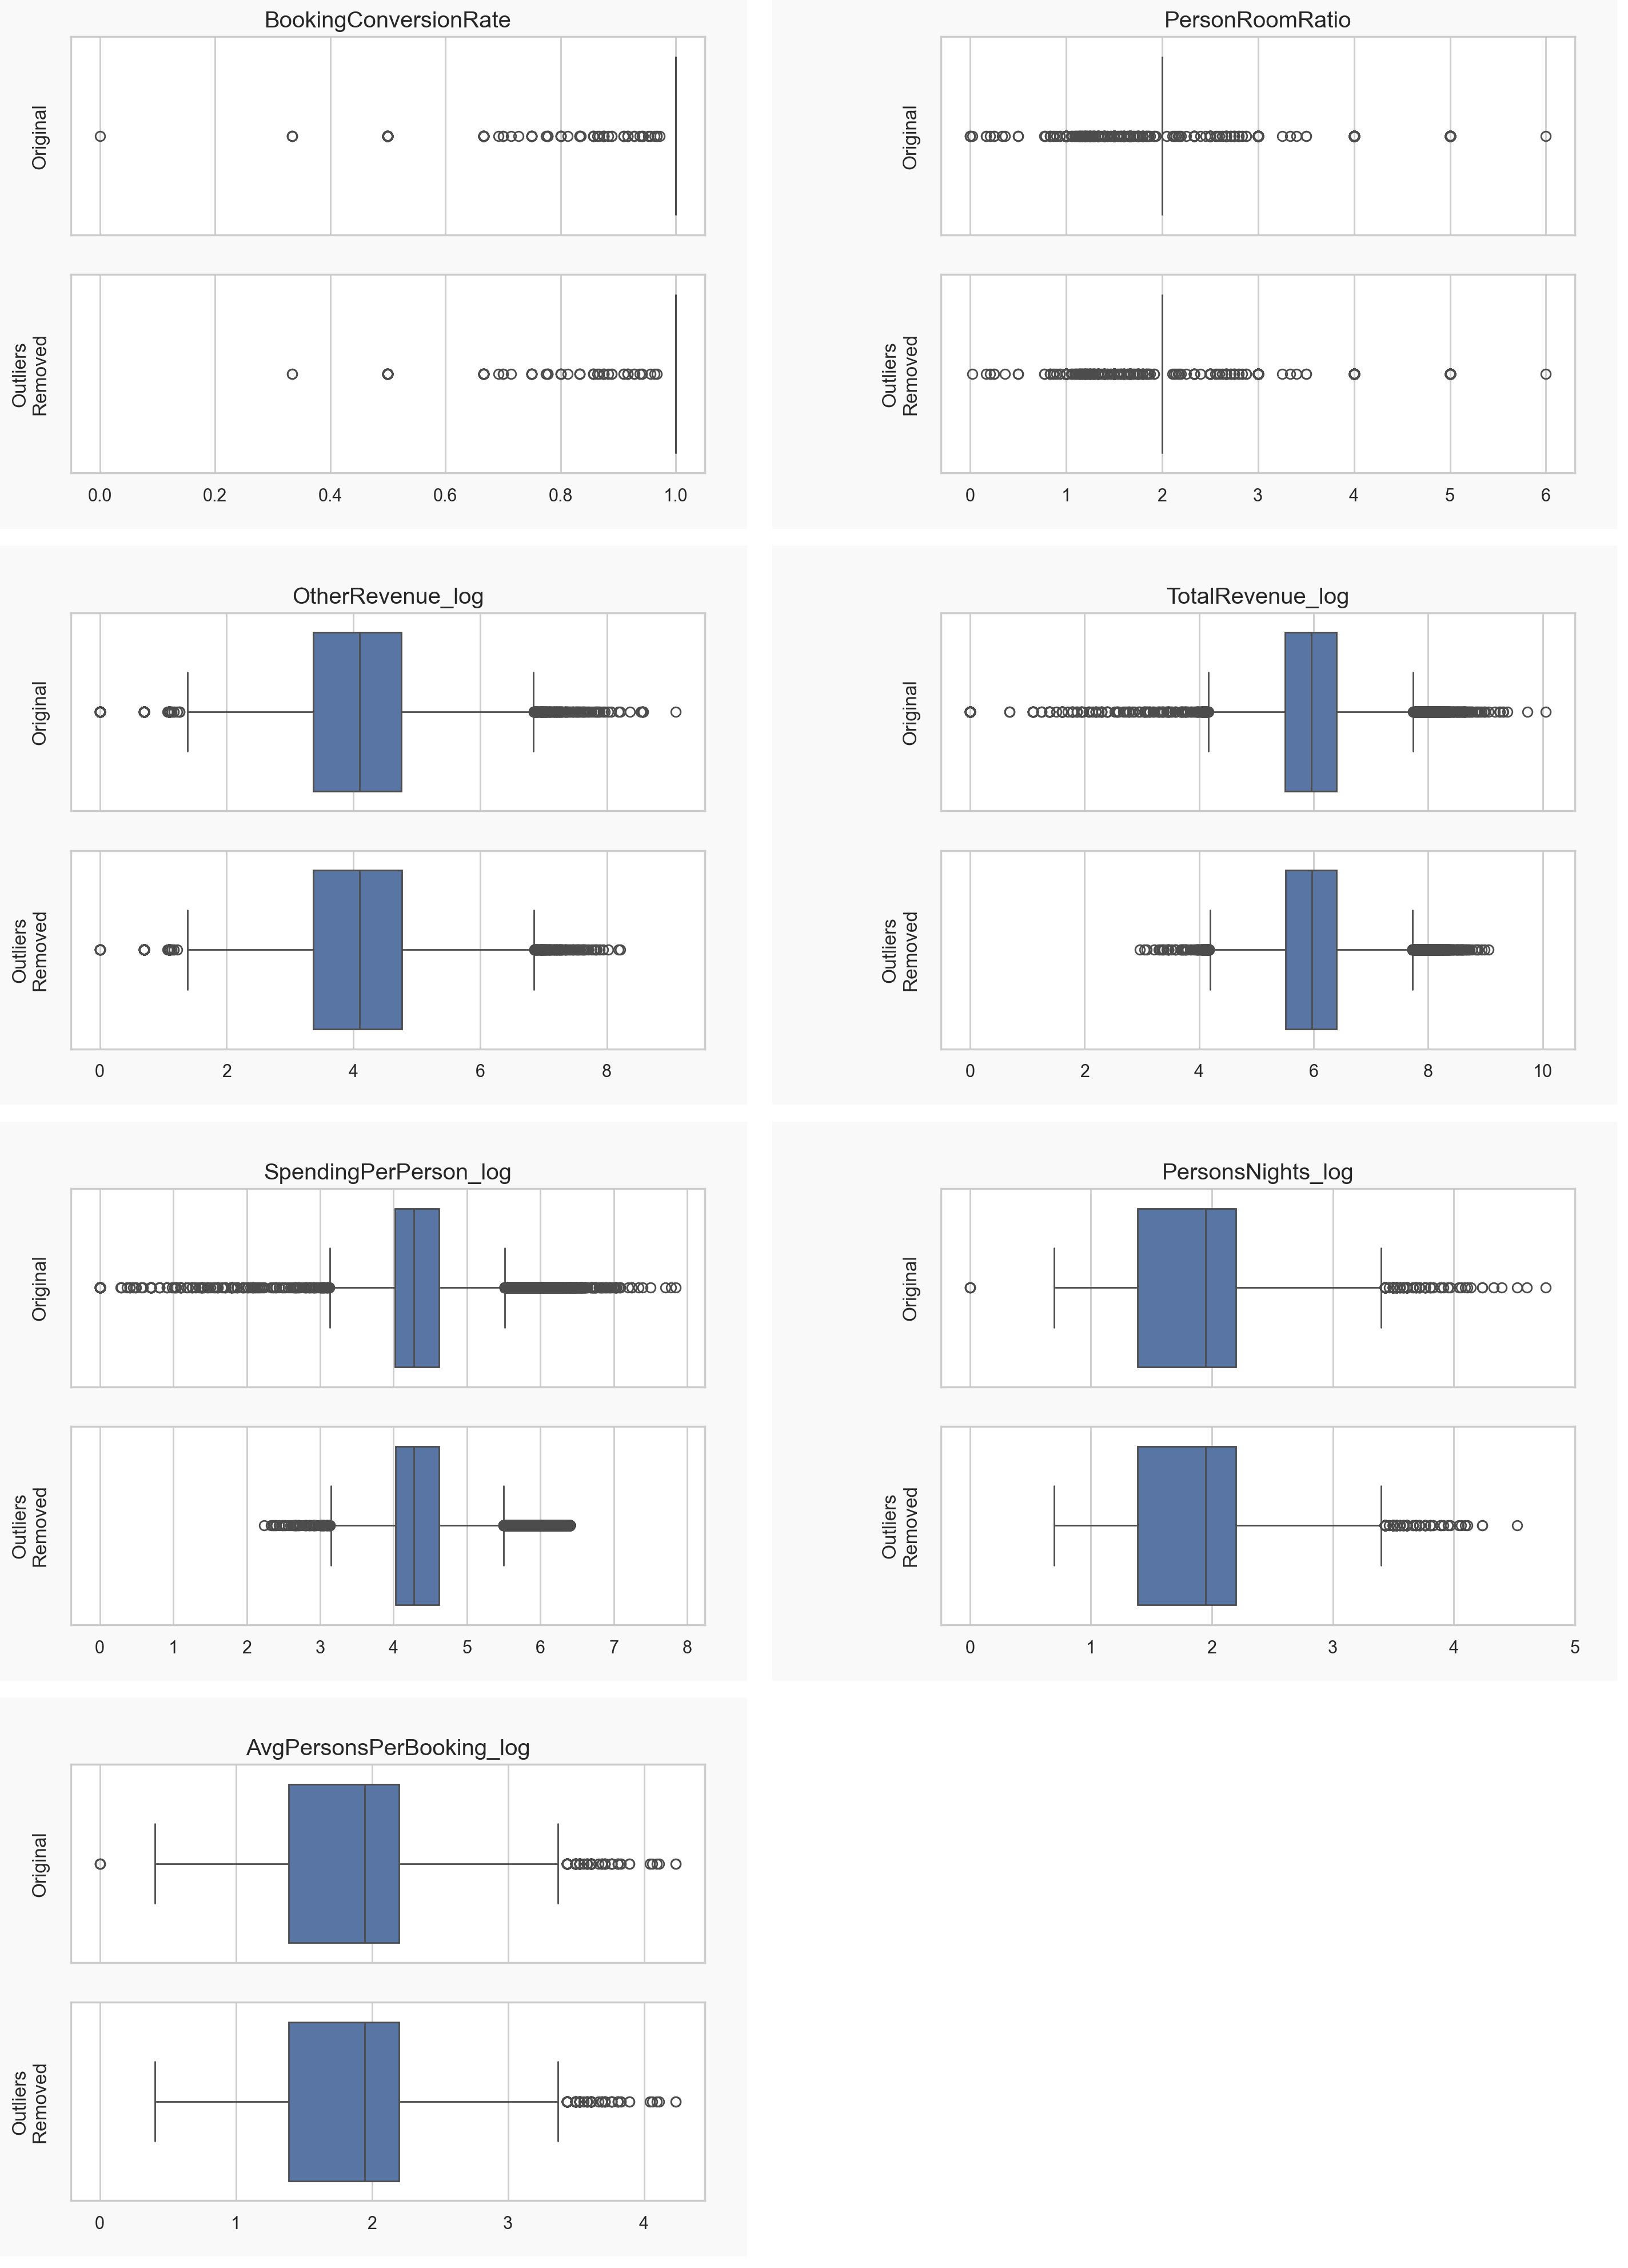

In [54]:
right_perc,right_iqr,left_iqr,left_perc = iqr_or_percentile(X,numerical,3)
df_transformed_wo_outliers = remove_outliers_iqr(X,right_iqr,3)

compare_figure_outliers(X,df_transformed_wo_outliers,numerical)

> Check how many were dropped

In [55]:
(X.shape[0]-df_transformed_wo_outliers.shape[0])/X.shape[0]*100

0.9057040927820124

>  Remove a total from 1.27% of the data.

#### Saving outliers

In [56]:
outliers1 = X.index.difference(df_transformed_wo_outliers.index).tolist()

#### Saving normal rows

In [57]:
df_final = df_transformed_wo_outliers

## 4.9 Normalization

### Min-Max Scaler

In [58]:
X_minmax = X[numerical].copy()

# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(X_minmax)

# Replace the original columns with scaled values
X_minmax = pd.DataFrame(mm_scaled_feat, columns=X_minmax.columns, index=X_minmax.index)

# Display the updated DataFrame
X_minmax.head()

BookingConversionRate  PersonRoomRatio  OtherRevenue_log  \
ID                                                             
1                0.666667         0.250000          0.486554   
2                1.000000         0.333333          0.438864   
4                1.000000         0.333333          0.452275   
6                1.000000         0.333333          0.354138   
8                1.000000         0.333333          0.501013   

    TotalRevenue_log  SpendingPerPerson_log  PersonsNights_log  \
ID                                                               
1           0.589294               0.528876           0.408618   
2           0.577703               0.450606           0.503530   
4           0.567361               0.437712           0.503530   
6           0.550874               0.531102           0.337963   
8           0.640789               0.529911           0.503530   

    AvgPersonsPerBooking_log  
ID                            
1                   0.327411  
2                   0.566329  
4                   0.566329  
6                   0.380113  
8                   0.566329

### Standard Scaler

In [59]:
# Copy the numerical columns
X_standard = X[numerical].copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler and create a new DataFrame with scaled values
scaled_features = scaler.fit_transform(X_standard)

# Replace the original columns with scaled values
X_standard = pd.DataFrame(scaled_features, columns=X_standard.columns, index=X_standard.index)

# Display the updated DataFrame
X_standard.head()

BookingConversionRate  PersonRoomRatio  OtherRevenue_log  \
ID                                                             
1              -20.140719        -0.666594          0.381873   
2                0.039245         0.084564         -0.006731   
4                0.039245         0.084564          0.102544   
6                0.039245         0.084564         -0.697138   
8                0.039245         0.084564          0.499700   

    TotalRevenue_log  SpendingPerPerson_log  PersonsNights_log  \
ID                                                               
1          -0.000377              -0.330187           0.222160   
2          -0.142554              -1.355147           1.013623   
4          -0.269421              -1.523997           1.013623   
6          -0.471673              -0.301036          -0.367031   
8           0.631323              -0.316636           1.013623   

    AvgPersonsPerBooking_log  
ID                            
1                  -0.728718  
2                   1.042052  
4                   1.042052  
6                  -0.338114  
8                   1.042052

### Comparing Scalers

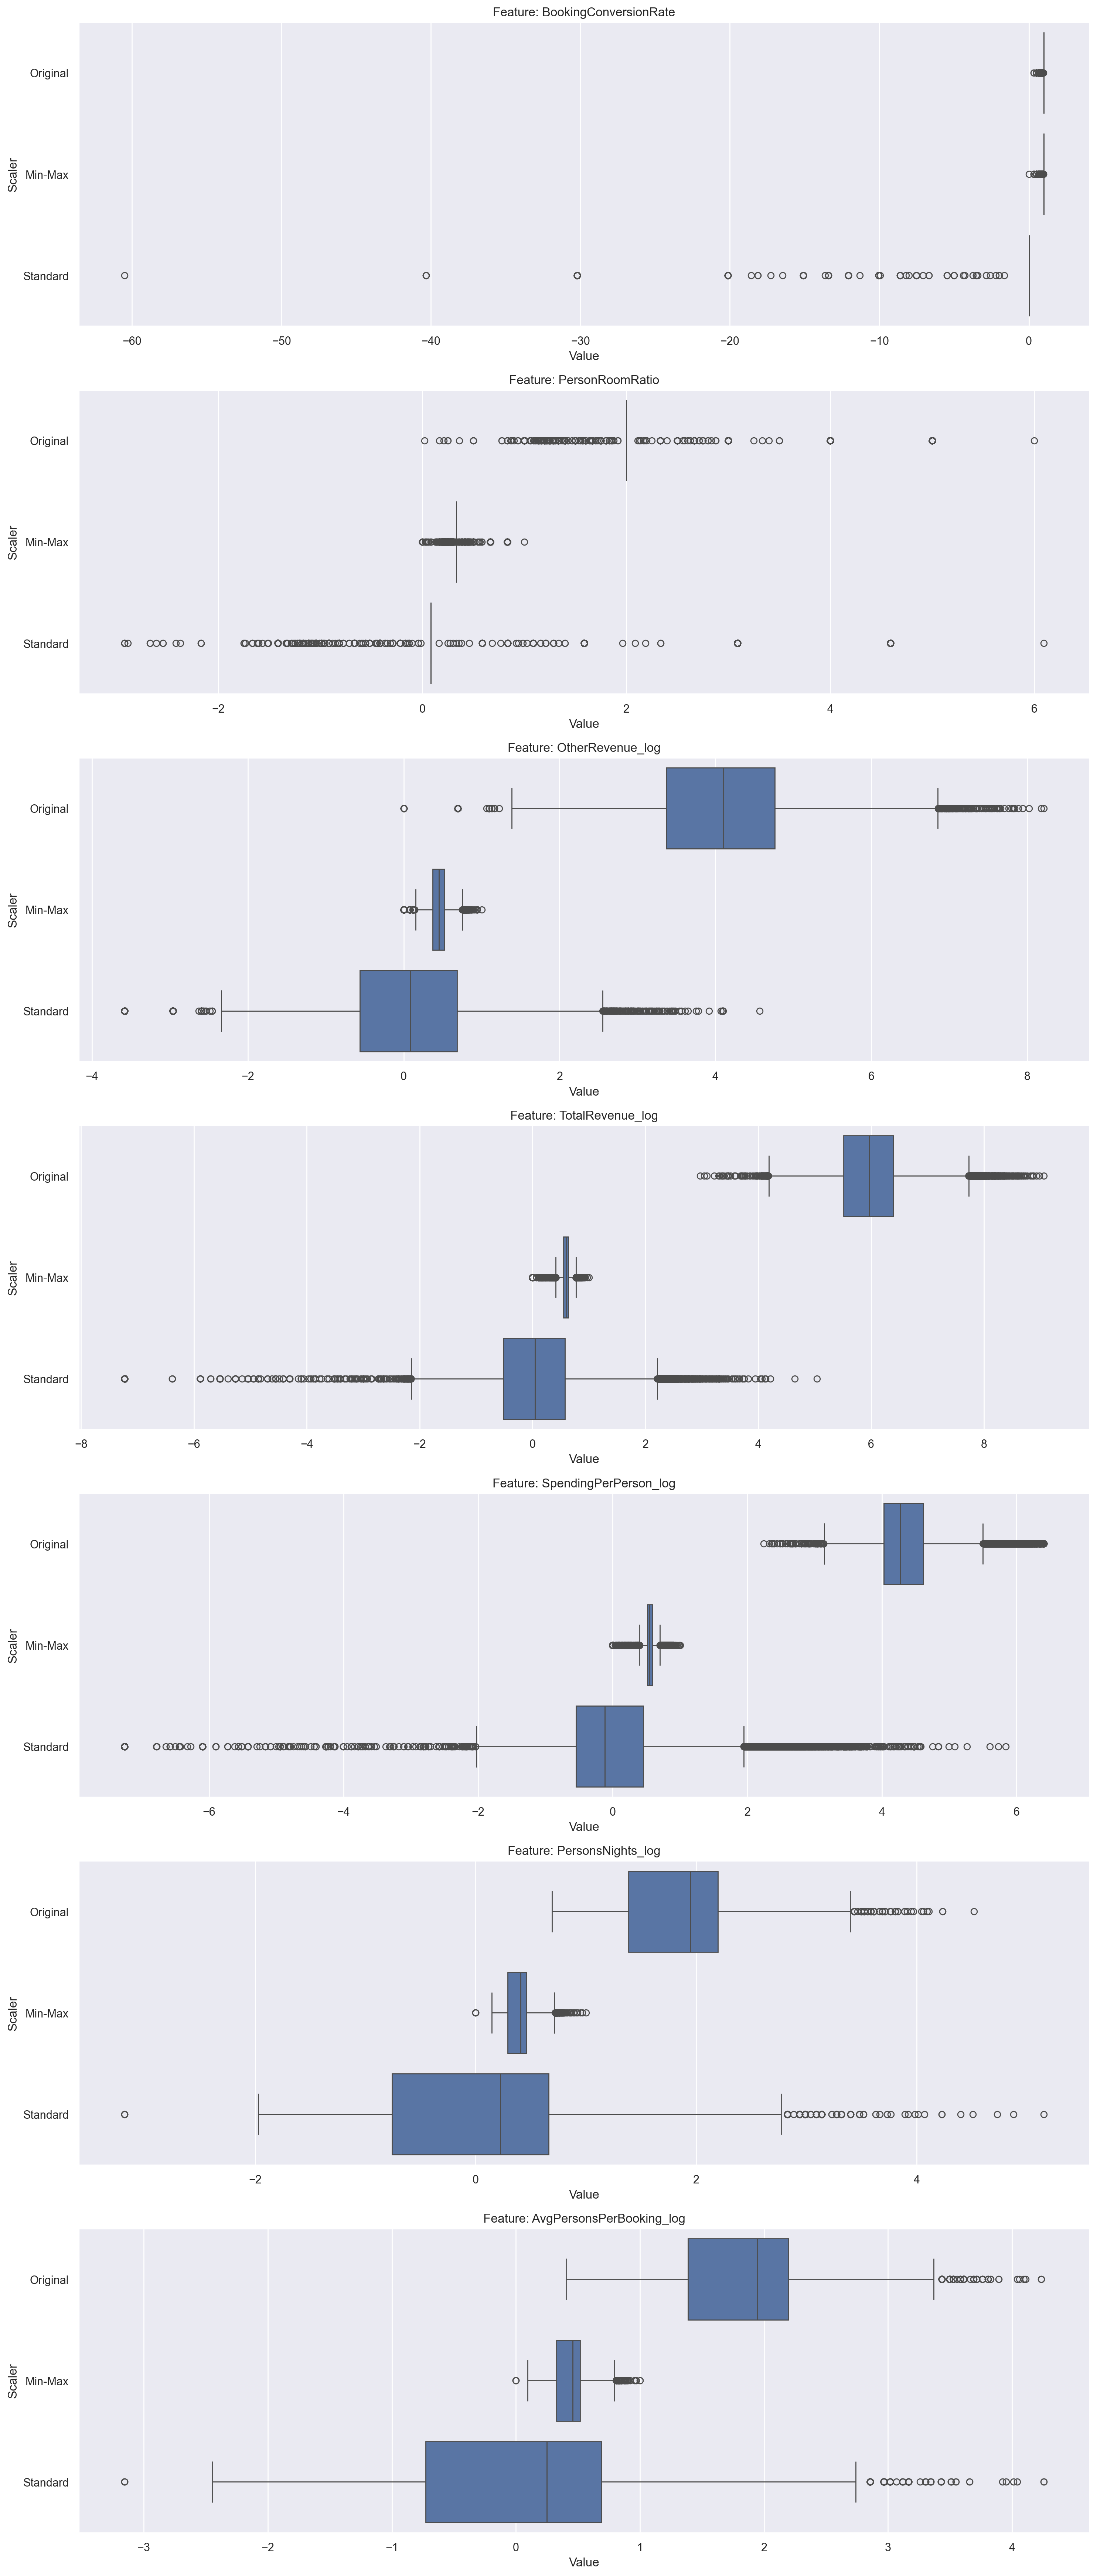

In [60]:
def plot_scaled_features(X, X_minmax, X_standard, numerical):
    # Prepare an empty DataFrame to combine data for plotting
    data_for_plot = pd.DataFrame()

    # Loop over each column in the DataFrames
    for feature in numerical:
        # Combine data from all three DataFrames for the current feature
        df_original = X[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
        df_original['Scaler'] = 'Original'
        df_original['Feature'] = feature

        df_minmax = X_minmax[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
        df_minmax['Scaler'] = 'Min-Max'
        df_minmax['Feature'] = feature

        df_standard = X_standard[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
        df_standard['Scaler'] = 'Standard'
        df_standard['Feature'] = feature

        # Concatenate into the plotting DataFrame
        data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard], ignore_index=True)

    # Convert the 'Value' column to numeric (to avoid errors with non-numeric data)
    data_for_plot['Value'] = pd.to_numeric(data_for_plot['Value'], errors='coerce')

    # Plotting: Create boxplots for each feature
    num_features = len(numerical)
    rows_per_figure = len(numerical)  # Number of rows (features) to plot per figure

    for start_idx in range(0, num_features, rows_per_figure):
        # Define the range of features to plot in this figure
        end_idx = min(start_idx + rows_per_figure, num_features)
        features_to_plot = numerical[start_idx:end_idx]

        # Filter data for this subset of features
        subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

        # Create the figure
        plt.figure(figsize=(15, 5 * len(features_to_plot)))

        # Loop through each feature and create a subplot
        for idx, feature in enumerate(features_to_plot, 1):
            plt.subplot(len(features_to_plot), 1, idx)
            sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
            plt.title(f'Feature: {feature}')

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()

plot_scaled_features(df_final, X_minmax, X_standard, numerical)

### Selecting the best Scaler

In [61]:
X[numerical] = X_standard

### Updating dataframes

In [62]:
df_final = X.loc[df_final.index]

In [63]:
df_final.head()

Nationality    DistributionChannel          MarketSegment  \
ID                                                             
1          PRT              Corporate              Corporate   
2          PRT  Travel Agent/Operator  Travel Agent/Operator   
4          FRA  Travel Agent/Operator  Travel Agent/Operator   
6          JPN  Travel Agent/Operator                  Other   
8          FRA  Travel Agent/Operator                  Other   

    SRAccessibleRoom  SRCrib  SRNoAlcoholInMiniBar  SRQuietRoom  \
ID                                                                
1                  0       0                     0            0   
2                  0       0                     0            0   
4                  0       0                     0            0   
6                  0       0                     0            0   
8                  0       0                     0            0   

    PersonRoomRatio  BookingConversionRate        Continent  \
ID                                                            
1         -0.666594             -20.140719  Southern Europe   
2          0.084564               0.039245  Southern Europe   
4          0.084564               0.039245   Western Europe   
6          0.084564               0.039245            Other   
8          0.084564               0.039245   Western Europe   

    AccompanyingGuest  MultipleRooms AgeGroup           LeadTimeSegment  \
ID                                                                        
1                   1              1      50+  Early Planner (>30 Days)   
2                   1              1    30-50  Early Planner (>30 Days)   
4                   1              1      50+  Early Planner (>30 Days)   
6                   1              1      50+  Early Planner (>30 Days)   
8                   1              1    30-50  Early Planner (>30 Days)   

       FloorAsked      BathAsked       BedAsked DistanceElevatorAsked  \
ID                                                                      
1   Not specified  Not specified  Not specified         Not specified   
2   Not specified  Not specified  Not specified         Not specified   
4   Not specified  Not specified  Not specified         Not specified   
6   Not specified  Not specified  Not specified         Not specified   
8   Not specified  Not specified    KingSizeBed         Not specified   

    OtherRevenue_log  TotalRevenue_log  SpendingPerPerson_log  \
ID                                                              
1           0.381873         -0.000377              -0.330187   
2          -0.006731         -0.142554              -1.355147   
4           0.102544         -0.269421              -1.523997   
6          -0.697138         -0.471673              -0.301036   
8           0.499700          0.631323              -0.316636   

    PersonsNights_log  AvgPersonsPerBooking_log  SpendingTier  
ID                                                             
1            0.222160                 -0.728718   Low Spender  
2            1.013623                  1.042052   Low Spender  
4            1.013623                  1.042052   Low Spender  
6           -0.367031                 -0.338114   Low Spender  
8            1.013623                  1.042052  High Spender

<h1> DBScan for Outliers</h1>

In [64]:
def remove_outliers(df, columns, lower_percentile=2, upper_percentile=98):
    """
    Removes outliers from a DataFrame using percentile-based filtering.
    
    Parameters:
    df (DataFrame): The dataset to clean.
    columns (list): List of numeric columns to process.
    lower_percentile (int): Lower percentile threshold (default=1%).
    upper_percentile (int): Upper percentile threshold (default=99%).

    Returns:
    DataFrame: Cleaned dataset with outliers removed.
    """
    
    df_clean = df.copy()  # Copy to avoid modifying the original dataset
    rows_removed = {}  # Store count of removed rows per column
    total_removed = 0  # Track total removed rows
    
    for column in columns:
        lower_bound = df_clean[column].quantile(lower_percentile / 100)
        upper_bound = df_clean[column].quantile(upper_percentile / 100)

        # Count removed rows
        removed = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)].shape[0]
        rows_removed[column] = removed
        total_removed += removed
        
        # Apply filtering
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    print(f"Rows removed per column: {rows_removed}")
    print(f"Total rows removed: {total_removed}")
    print(f"Percentage removed: {round((total_removed / df.shape[0]) * 100, 4)}%")
    
    return df_clean


df_cleaned = remove_outliers(df_final, numerical, lower_percentile=1, upper_percentile=99)


Rows removed per column: {'BookingConversionRate': 130, 'PersonRoomRatio': 147, 'OtherRevenue_log': 1098, 'TotalRevenue_log': 1478, 'SpendingPerPerson_log': 1449, 'PersonsNights_log': 662, 'AvgPersonsPerBooking_log': 591}
Total rows removed: 5555
Percentage removed: 7.3796%


### Updating dataframes

In [65]:
df_final = df_final.loc[df_cleaned.index]
outliers = X.index.difference(df_final.index)
df_outliers = X.loc[outliers]

In [66]:
df_final.head()

Nationality    DistributionChannel          MarketSegment  \
ID                                                             
2          PRT  Travel Agent/Operator  Travel Agent/Operator   
6          JPN  Travel Agent/Operator                  Other   
8          FRA  Travel Agent/Operator                  Other   
10         IRL  Travel Agent/Operator  Travel Agent/Operator   
12         FRA  Travel Agent/Operator  Travel Agent/Operator   

    SRAccessibleRoom  SRCrib  SRNoAlcoholInMiniBar  SRQuietRoom  \
ID                                                                
2                  0       0                     0            0   
6                  0       0                     0            0   
8                  0       0                     0            0   
10                 0       0                     0            0   
12                 0       0                     0            0   

    PersonRoomRatio  BookingConversionRate        Continent  \
ID                                                            
2          0.084564               0.039245  Southern Europe   
6          0.084564               0.039245            Other   
8          0.084564               0.039245   Western Europe   
10         0.084564               0.039245    British Isles   
12         0.084564               0.039245   Western Europe   

    AccompanyingGuest  MultipleRooms AgeGroup           LeadTimeSegment  \
ID                                                                        
2                   1              1    30-50  Early Planner (>30 Days)   
6                   1              1      50+  Early Planner (>30 Days)   
8                   1              1    30-50  Early Planner (>30 Days)   
10                  1              1      <30  Early Planner (>30 Days)   
12                  1              1      50+  Early Planner (>30 Days)   

       FloorAsked      BathAsked       BedAsked DistanceElevatorAsked  \
ID                                                                      
2   Not specified  Not specified  Not specified         Not specified   
6   Not specified  Not specified  Not specified         Not specified   
8   Not specified  Not specified    KingSizeBed         Not specified   
10  Not specified  Not specified  Not specified         Not specified   
12  Not specified  Not specified  Not specified         Not specified   

    OtherRevenue_log  TotalRevenue_log  SpendingPerPerson_log  \
ID                                                              
2          -0.006731         -0.142554              -1.355147   
6          -0.697138         -0.471673              -0.301036   
8           0.499700          0.631323              -0.316636   
10          0.225923         -0.525448              -1.037091   
12          0.367772         -0.004609              -1.171031   

    PersonsNights_log  AvgPersonsPerBooking_log  SpendingTier  
ID                                                             
2            1.013623                  1.042052   Low Spender  
6           -0.367031                 -0.338114   Low Spender  
8            1.013623                  1.042052  High Spender  
10           0.222160                  0.250868   Low Spender  
12           1.013623                  1.042052   Low Spender

In [67]:
df_outliers.head()

Nationality    DistributionChannel          MarketSegment  \
ID                                                             
1          PRT              Corporate              Corporate   
4          FRA  Travel Agent/Operator  Travel Agent/Operator   
19         FRA  Travel Agent/Operator  Travel Agent/Operator   
39         PRT                 Direct          Complementary   
40         PRT                 Direct          Complementary   

    SRAccessibleRoom  SRCrib  SRNoAlcoholInMiniBar  SRQuietRoom  \
ID                                                                
1                  0       0                     0            0   
4                  0       0                     0            0   
19                 0       0                     0            0   
39                 0       0                     0            0   
40                 0       0                     0            0   

    PersonRoomRatio  BookingConversionRate        Continent  \
ID                                                            
1         -0.666594             -20.140719  Southern Europe   
4          0.084564               0.039245   Western Europe   
19         0.084564               0.039245   Western Europe   
39        -1.417752               0.039245  Southern Europe   
40        -1.417752               0.039245  Southern Europe   

    AccompanyingGuest  MultipleRooms AgeGroup           LeadTimeSegment  \
ID                                                                        
1                   1              1      50+  Early Planner (>30 Days)   
4                   1              1      50+  Early Planner (>30 Days)   
19                  1              1      <30  Early Planner (>30 Days)   
39                  0              0    30-50     Last-Minute (<7 Days)   
40                  0              0    30-50     Last-Minute (<7 Days)   

       FloorAsked      BathAsked       BedAsked DistanceElevatorAsked  \
ID                                                                      
1   Not specified  Not specified  Not specified         Not specified   
4   Not specified  Not specified  Not specified         Not specified   
19      HighFloor  Not specified    KingSizeBed         Not specified   
39  Not specified  Not specified  Not specified         Not specified   
40  Not specified  Not specified  Not specified         Not specified   

    OtherRevenue_log  TotalRevenue_log  SpendingPerPerson_log  \
ID                                                              
1           0.381873         -0.000377              -0.330187   
4           0.102544         -0.269421              -1.523997   
19         -0.345670         -0.702655              -1.739209   
39         -3.582883         -7.229317              -7.255891   
40         -3.582883         -7.229317              -7.255891   

    PersonsNights_log  AvgPersonsPerBooking_log SpendingTier  
ID                                                            
1            0.222160                 -0.728718  Low Spender  
4            1.013623                  1.042052  Low Spender  
19           0.662232                  0.690785  Low Spender  
39          -1.971533                 -1.942047  Low Spender  
40          -1.971533                 -1.942047  Low Spender

# 5. Exporting Data

In [68]:
df_final.reset_index(inplace=True)
df_final.to_csv("Case1_HotelCustomerSegmentation_Preprocessed.csv", index=False)

In [69]:
df_outliers.reset_index(inplace=True)
df_outliers.to_csv("Case1_HotelCustomerSegmentation_Preprocessed_Outliers.csv", index=False)